Vorgehen - Entscheidungsbäume (Code)

Im folgenden wird unser Vorgehen exemplarisch dargestellt. Wegen der Vielzahl an Daten und der damit verbundenen hohen
Rechenzeit haben wir aus den hier vorgestellten Ansätzen Skripte zum ausführen erstellt, damit unsere eigenen Rechner
und Entwicklungsumgebungen nicht von der langen Rechnung beeinflusst werden. Zu Auswertung haben wir uns diverse Plots
und Tabellen als csv Dateien ausgeben lassen.
Odnernamen und sonstige allgemeine relevante Titel haben wir in der Datei "Global_configurations.py" gespeichert.

Datenerhebung

Durch unseren Ansatz mit möglich vielen Daten zu arbeiten haben wir versucht so viele Datensätze wie möglich
herunterzuladen und als Features zu verwenden.
Für die Weltbankdaten wird der Massendownload verwendet und die Daten werden vorbereitet. Nachvollziehbarkeit: "prepare_WB.py"
Das Vorgehen für die OECD:
1. Extrahieren aller Keys für Datensätzer die mit der API verfügbar sind aus dem Quellcode der Seite
2. Herunterladen aller verfügbaren Datensätze für den Zeitraum von 1998-2018 und speichern als csv.

In [2]:
from Global_configuartions import *
import requests as rq
import re
from functions_downloader import oecd_data_load_and_save
from tqdm import tqdm

# get all the keys
r = rq.get('https://stats.oecd.org/')
# set to remove duplicates and then list to make it easier to handle
keys = sorted(list(set(re.findall(re.compile(r'\?DataSet=(.*?)"'), r.text))))
with open("../keys.csv", "w", encoding='utf-8') as file:
    file.write('\n'.join(keys))
keys

['7HA_A_Q',
 '7IA_A_Q',
 '7II_INDIC',
 '7PSD_D1D4',
 'AEA',
 'AEI_NUTRIENTS',
 'AEI_OTHER',
 'AFA_CALC_IN3',
 'AFA_CALC_OUT3',
 'AFA_IN3',
 'AFA_IN3_MANUF',
 'AFA_OUT3',
 'AFA_OUT3_PARTNER',
 'AFDDANN',
 'AFRICAPOLIS',
 'AGE_GAP',
 'AIRTRANS_CO2',
 'AIR_EMISSIONS',
 'AIR_GHG',
 'ALFS_EMP',
 'ALFS_EMP_ARCHIVE',
 'ALFS_POP_LABOUR',
 'ALFS_POP_VITAL',
 'ALFS_SUMTAB',
 'ALFS_SUMTAB_ARCHIVE',
 'AMNE_IN',
 'AMNE_IN_PARTNER',
 'AMNE_OUT',
 'AMNE_OUT_PARTNER',
 'ANBERD2011_REV3',
 'ANBERD_REV2',
 'ANBERD_REV4',
 'ANHRS',
 'AVD_DUR',
 'AVE_HRS',
 'AV_AN_WAGE',
 'AWCOMP',
 'AWCOU',
 'BATIS_EBOPS2002',
 'BATIS_EBOPS2010',
 'BENCHMARK_STIO',
 'BERD_COST',
 'BERD_COST_ISIC4',
 'BERD_FUNDS',
 'BERD_FUNDS_ISIC4',
 'BERD_INDU',
 'BERD_INDUSTRY',
 'BERD_INDUSTRY_ISIC4',
 'BERD_MA_SOF',
 'BERD_MA_TOE',
 'BERD_SIZE',
 'BERD_SOF_SIZE',
 'BERD_STIO',
 'BFGID',
 'BFSIGI',
 'BIMTS_CPA',
 'BLI',
 'BLI2013',
 'BLI2014',
 'BLI2015',
 'BLI2016',
 'BLI2017',
 'BPF1',
 'BROADBAND_DB',
 'BSI',
 'BTDIXE',
 'BTDIXE_I

In [4]:
# just as a help to taking a closer look at the different data tables - some might have aggregated information
# or only include specific data (years/countries)
# finding groups by anticipating similar name tags
# https://stats.oecd.org/Index.aspx?DataSetCode=LAND_COVER_FUA
# https://stats.oecd.org/restsdmx/sdmx.ashx/GetDataStructure/EO43_VINTAGE
def help_analysis(keys):
    """Look at the key names and count letter combinations that appear often"""
    pairs = {}
    triplets = {}
    for key in keys:
        for index, letter in enumerate(key[:-2]):
            next_letter = key[index + 1]
            pair = letter + next_letter
            next_next_letter = key[index + 2]
            triplet = pair + next_next_letter
            pairs[pair] = pairs.setdefault(pair, 0) + 1
            triplets[triplet] = triplets.setdefault(triplet, 0) + 1
    p_analysis = {k: v for k, v in sorted(pairs.items(), reverse=True, key=lambda item: item[1])}
    trip_analysis = {k: v for k, v in sorted(triplets.items(), reverse=True, key=lambda item: item[1])}
    print(p_analysis)
    print(trip_analysis)

help_analysis(keys)

{'TA': 216, 'RE': 197, 'IN': 180, 'EO': 163, '20': 157, '_T': 150, '01': 140, 'A_': 133, 'LE': 131, 'EV': 129, 'AG': 127, 'AB': 127, 'BL': 127, '_I': 125, 'S_': 120, 'NA': 111, 'NT': 100, 'ER': 99, 'SN': 90, 'ON': 86, 'TR': 78, '_A': 76, 'MO': 76, 'E_': 74, '_S': 71, 'VI': 68, 'TE': 68, '_E': 64, 'D_': 63, 'FS': 63, 'DI': 61, '_C': 61, 'RA': 61, '_V': 61, 'N2': 61, '_2': 58, 'TI': 57, 'ND': 56, 'AT': 56, '3_': 55, 'EN': 54, '_F': 54, 'EA': 53, 'ST': 52, 'I_': 51, '_R': 51, 'IS': 50, 'AD': 49, '_P': 47, 'FI': 47, 'FF': 46, '_M': 45, 'G_': 45, 'IO': 44, 'H_': 43, 'AN': 42, 'AR': 42, 'N_': 41, 'MA': 40, 'NE': 39, 'R_': 37, 'IV': 37, 'T_': 37, 'EC': 37, 'AS': 37, 'CO': 36, 'SH': 36, 'HI': 34, 'CT': 34, 'AI': 33, 'CH': 33, 'RD': 33, 'DE': 33, 'SI': 32, 'SE': 32, '_D': 31, 'C_': 31, 'IC': 31, 'AL': 30, 'LA': 30, 'IT': 29, '11': 29, 'TO': 29, 'RS': 29, 'O8': 29, 'RI': 28, 'OU': 28, 'DU': 28, '12': 28, 'PA': 27, 'OR': 27, 'PE': 26, '5_': 26, '8_': 26, 'TS': 25, 'CA': 24, 'LI': 24, 'RC': 24, '1

Auf Basis dieser kleinen Auswertung und dem nachgucken der einiger Keys auf der Seite der OECD, haben wir einige keys "ausgeschlossen".
Primär, weil die Daten gedoppelt vorkamen. Die Funktionen zum aussortieren und herunterladen haben wir zu Gunsten der Übersichtlichkeit
in einem separaten Dokument geschrieben. Zu finden sind diese in "function_downloader.py".

Anschließend haben wir den Downloader als Skript geschrieben und initiiert: "Downloader_Script.py"
Dieses Skript konnten wir dann auf dem Server und all unseren unseren Rechnern ausführen, sodass überall ein gleichnamiger
Ordner mit den Datein liegt um weiter damit arbeiten zu können.

Für eine Übersicht über die uns zur Verfügung stehenden Daten bzw. den Spaltennamen haben wir folgende kleine Analyse verwendet:

In [15]:
from Global_configuartions import FOLDERNAME_RAW, FOLDERNAME_PREP
from pathlib import Path
from collections import Counter
import pandas as pd

def analyse_columns(keys, foldername):
    """identify all remaining column names of all files"""
    col_names = []
    path = Path(foldername)
    pbar = tqdm(keys)

    for key in pbar:
        pbar.set_description(key)
        file_key = path / f"{key}.csv"
        df = pd.read_csv(file_key, nrows=1)
        key_col_names = df.columns.to_list()
        col_names.extend(key_col_names)

    col_count = Counter(col_names)
    return pd.DataFrame.from_dict(col_count, orient="index").sort_values(by=0, ascending=False)

path_raw = Path(FOLDERNAME_RAW)
path_prep = Path(FOLDERNAME_PREP)

# list of all keys we have downloaded
keys_downloaded = [x.name.rstrip(".csv") for x in path_raw.iterdir() if x.is_file()]

# run analysis on keys to find out frequency of different column-names
column_overview = analyse_columns(keys_downloaded, FOLDERNAME_RAW)
column_overview

WSECTOR: 100%|██████████| 529/529 [00:05<00:00, 92.83it/s]                        


,0
Flag Codes,528
Value,528
Flags,528
Country,402
Unit,359
...,...
Injury type,1
INJURY_TYPE,1
To: (sector in column),1
COL,1


Mithilfe der Funktion sowie der regelmäßigen Betrachtung der Daten haben wir iterativ Funktionen geschrieben, um die Daten aufzubereiten.
Die Funktionen finden sich inhaltlich getrennt in vier Bereiche in den folgenden Dateien:
1. Allgemeines "ausmisten" der Spalten in "functions_data_prep_overall.py"
2. Identifizieren und Benennen der Spalte die Informationen über die Jahre beinhaltet: "functions_data_prep_annual_data.py"
3. Identifizieren, relevante Einträge aufwählen und Benennen der Spalte die Informationen über das Land beinhaltet: "functions_data_prep_country_data.py"
4. Datensätze so vorbereiten, dass die Feature-Spalten benannt sind und die Einträge aggregiert sind. "functions_data_prep_feature_shape.py"

Das Skript "Preparation-Script.py" nutzt diese Funktionen, bereitet die jeweiligen Datensätze auf und speichert sie in einem Ordner.
In diesen Ordner legen wir auch die aufbereiteten Weltbankdaten und können mit der Modellierung beginnen.
Es resultiert eine csv Datei die zu jedem Dataset den Status der transformation beinhaltet.

Die Datei "Pisa_exploration.ipynb" beinhaltet unsere Analyse der Pisa Daten.

Modellierung

Input Daten - Erstellung der verschiedenen Input Daten die wir für den Vergleich der Modelle nutzen möchten jeweils asl csv.

Zur Ausführbarkeit auf dem Server sowie unserer aller Rechner wurde hier natürlich wieder ein Skript verwendet.
Die Funktionen hierfür sind in "functions_input_data.py" gespeichert. Der Inhalt des Skript namens "Input_Data-Script.py"
sowie einige Betrachtungen zu den Ergebnissen werden hier ausgeführt.

In [14]:
from functions_input_data import *
from pathlib import Path
import itertools
from tqdm import tqdm

# Definition of several parameters
Input_Data = ["aggregated-years", "pisa-years"]
Pisa_Type = ["MATH", "READ", "SCIENCE"]
path_0 = Path(FOLDERNAME_MODELLING_DATA)
path_input = Path(path_0/"Input Data")

# location of pisa data
path_pisa = Path(FOLDERNAME_PISA)
path_final_data = Path(FOLDERNAME_FINAL_DATA)

# percentages of non-na Data we want to compare
Iterations = np.arange(50, 105, 5)

# remove for script - overview table of feature information
index = itertools.product(Input_Data, Pisa_Type, Iterations)
overview_input_data = pd.DataFrame(columns=["Inpu_Data_Type", "Pisa-Type", "Percentage_non_NA", "Number_Features",
                                            "Average_Percentage_NAs", "Average_Percentage_apprximated_Interpolation",
                                            "Average_Percentage_approximated_Annual_Mean"], index=pd.MultiIndex.from_tuples(index))

# For each type of input Data
InputData = tqdm(Input_Data)
for input_data in InputData:
    InputData.set_description(f"{input_data}")

    # create Folders - one Folder per Input type
    path_0.mkdir(exist_ok=True)
    path_input.mkdir(exist_ok=True)
    path_data_type = Path(path_input / input_data)
    path_data_type.mkdir(exist_ok=True)

    # for every Pisa type seperately, as they start in different years
    pbar0 = tqdm(Pisa_Type)
    for pisa_type in pbar0:
        pbar0.set_description(f"{input_data}-{pisa_type}")
        pisa_type_lower = str.lower(pisa_type)

        # load Pisa Data
        pisa_file_name = f"20-11-05_PISA_{pisa_type_lower}_total.csv"
        pisa_data = pd.read_csv(path_pisa / pisa_file_name)

        pisa_data = pisa_data.rename(columns={"value": "PISA-SCORE"})
        pisa_data = pisa_data.set_index("Index")

        # load dataset_keys for all data sets that have been prepared up to the final state
        datasets_keys = [x.name.replace(".csv", "") for x in path_final_data.iterdir() if x.is_file()]

        # differentiation between different percentages of non-na values
        pbar = tqdm(Iterations)
        for iteration in pbar:
            pbar.set_description(f"{input_data}-{pisa_type}-{iteration}")

           # destinguish between input data types
            if input_data == "aggregated_years":
                data_for_model = create_data_in_pisa_structure_aggregate_years(pisa_data, datasets_keys, iteration, True)
            else:
                data_for_model = create_data_in_pisa_structure_only_pisa_years_no_aggregation(pisa_data, datasets_keys,
                                                                                              iteration, True)
            # remove Pisa entries
            data_for_model = remove_PISA_data_from_data(data_for_model)

            # replace nan values and save csv
            data_for_model, column_information = interpolate_nan_values_or_set_mean_if_not_possible(data_for_model)
            data_for_model.to_csv(Path(path_input/input_data)/f"{pisa_type}-{iteration}.csv")

            # remove for script - overview of feature Information
            ind = (input_data, pisa_type, iteration)
            overview_input_data.loc[ind, "Inpu_Data_Type"] = input_data
            overview_input_data.loc[ind, "Pisa-Type"] = pisa_type
            overview_input_data.loc[ind, "Percentage_non_NA"] = iteration
            overview_input_data.loc[ind, "Number_Features"] = len(column_information)-3
            overview_input_data.loc[ind, "Average_Percentage_NAs"] = column_information.iloc[3:, 1].mean()
            overview_input_data.loc[ind, "Average_Percentage_apprximated_Interpolation"] = column_information.iloc[3:, 3].mean()
            overview_input_data.loc[ind, "Average_Percentage_approximated_Annual_Mean"] = column_information.iloc[3:, 5].mean()


            # store column information - only needed for iterations = 50, as it includes all features that are also
            # included in the other iterations
            if iteration == 50:
                feature_columns = [x for x in data_for_model.columns if x != "PISA-SCORE" and x != "COUNTRY"]
                column_information.to_csv(Path(path_input/input_data) / f"{pisa_type}-Column_information.csv")

# remove from script
overview_input_data.to_csv(path_input / "Overview_Input_Data_Types.csv")


aggregated-years-MATH:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

aggregated-years-MATH-50:   0%|          | 0/11 [00:00<?, ?it/s]

aggregated-years-MATH-50:   9%|▉         | 1/11 [00:16<02:49, 16.96s/it]

aggregated-years-MATH-55:   9%|▉         | 1/11 [00:16<02:49, 16.96s/it]

aggregated-years-MATH-55:  18%|█▊        | 2/11 [00:24<02:07, 14.20s/it]

aggregated-years-MATH-60:  18%|█▊        | 2/11 [00:24<02:07, 14.20s/it]

aggregated-years-MATH-60:  27%|██▋       | 3/11 [00:31<01:36, 12.08s/it]

aggregated-years-MATH-65:  27%|██▋       | 3/11 [00:31<01:36, 12.08s/it]

aggregated-years-MATH-65:  36%|███▋      | 4/11 [00:35<01:06,  9.52s/it]

aggregated-years-MATH-70:  36%|███▋      | 4/11 [00:35<01:06,  9.52s/it]

aggregated-years-MATH-70:  45%|████▌     | 5/11 [00:38<00:45,  7.54s/it]

aggregated-years-MATH-75:  45%|████▌     | 5/11 [00:38<00:45,  7.54s/it]

aggregated-years-MATH-75:  55%|█████▍    | 6/11 [00:40<00:30,  6.04s/it]

aggregated-years-M

In [15]:
# preview of the overall table
overview_input_data

Inpu_Data_Type Pisa-Type Percentage_non_NA  \
aggregated-years MATH    50   aggregated-years      MATH                50   
                         55   aggregated-years      MATH                55   
                         60   aggregated-years      MATH                60   
                         65   aggregated-years      MATH                65   
                         70   aggregated-years      MATH                70   
...                                        ...       ...               ...   
pisa-years       SCIENCE 80         pisa-years   SCIENCE                80   
                         85         pisa-years   SCIENCE                85   
                         90         pisa-years   SCIENCE                90   
                         95         pisa-years   SCIENCE                95   
                         100        pisa-years   SCIENCE               100   

                             Number_Features Average_Percentage_NAs  \
aggregated-years MATH    50             3136                28.7104   
                         55             2518                 25.803   
                         60             1986                22.7536   
                         65             1480                19.3594   
                         70             1133                16.7192   
...                                      ...                    ...   
pisa-years       SCIENCE 80             1029                18.5134   
                         85              742                15.8742   
                         90              400                11.6992   
                         95              153                8.32421   
                         100               7                2.32052   

                             Average_Percentage_apprximated_Interpolation  \
aggregated-years MATH    50                                       11.3943   
                         55                                       10.3619   
                         60                                       9.09091   
                         65                                        7.2037   
                         70                                       6.38347   
...                                                                   ...   
pisa-years       SCIENCE 80                                       10.0521   
                         85                                       9.36008   
                         90                                        7.4099   
                         95                                        6.0781   
                         100                                      1.81291   

                             Average_Percentage_approximated_Annual_Mean  
aggregated-years MATH    50                                      17.3162  
                         55                                       15.441  
                         60                                      13.6627  
                         65                                      12.1557  
                         70                                      10.3357  
...                                                                  ...  
pisa-years       SCIENCE 80                                      8.46122  
                         85                                      6.51415  
                         90                                      4.28934  
                         95                                      2.24611  
                         100                                    0.507614  

[66 rows x 7 columns]

Die verschiedenen Input-Daten sind fertig und gespeichert. Um die bestmöglichen Inputdaten zu wählen haben wir die Modellierung standardisiert.

Unser erstes Modell für Pisa Read inklusive der Tabellen und Plots die wir in Anschluss bei allen Modellen im Skirpt
ausgegeben haben ist hier aufgeführt. Der Random State beim Daten-Split bleibt durchgängig gleich.

In [ ]:
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pandas as pd
import numpy as np
from Global_configuartions import FOLDERNAME_MODELLING_DATA

# Paths to store results
path_0 = Path(FOLDERNAME_MODELLING_DATA)
path_results = Path(path_0/"Results")
path_tree = Path(path_0/"Trees")
path_input = Path(path_0/"Input Data")

# Defining variables
percentage_test_data = 15
pisa_type = "READ"
iteration = 50 # percentage of non-na data
input_data = "pisa-years"
model_run = "Example"

# create directories
path_results.mkdir(exist_ok=True)
path_results_modelrun = Path(path_results / model_run)
path_results_modelrun.mkdir(exist_ok=True)
path_results_modelrun.mkdir(exist_ok=True)
path_tree.mkdir(exist_ok=True)
path_tree_modelrun = Path(path_tree/model_run)
path_tree_modelrun.mkdir(exist_ok=True)

# load input data and meta data
data_for_model = pd.read_csv(Path(path_input/ input_data)/f"{pisa_type}-{iteration}.csv")
column_information = pd.read_csv(Path(path_input / input_data) / f"{pisa_type}-Column_information.csv")

if "Unnamed: 0" in column_information.columns:
    column_information = column_information.rename(columns={"Unnamed: 0": "Index"})
column_information = column_information.set_index("Index")
data_for_model = data_for_model.set_index("Index")

In [22]:
# prepare Data
feature_columns = [x for x in data_for_model.columns if x != "PISA-SCORE" and x != "COUNTRY"]
X = data_for_model[feature_columns]
y = data_for_model["PISA-SCORE"]

# Split Data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.15,
                                                                                        random_state=42)
X_test_final

,YEAR,TABLE_I7 - : Average wage in US dollars based on Purchasing Power Parities [Units US Dollar],TABLE_I7 - : Average wage in national currency units [Units National currency],TABLE_I7 - : Personal income tax & employee social security contributions (All-in rate) [Units Percentage],TABLE_I7 - : Personal income tax [Units Percentage],TABLE_I7 - : Threshold (expressed as a multiple of the average wage) [Units Ratio],TABLE_I7 - : Top tax rates [Units Percentage],AIR_EMISSIONS - : Carbon Monoxide + Combustion + nan [Thousands Tonnes],AIR_EMISSIONS - : Carbon Monoxide + Industrial combustion + nan [Thousands Tonnes],AIR_EMISSIONS - : Carbon Monoxide + Industrial processes and product use + nan [Thousands Tonnes],...,SP.URB.TOTL-Urban population,SP.URB.TOTL.IN.ZS-Urban population (% of total population),SP.URB.GROW-Urban population growth (annual %),"SL.EMP.VULN.FE.ZS-Vulnerable employment, female (% of female employment) (modeled ILO estimate)","SL.EMP.VULN.MA.ZS-Vulnerable employment, male (% of male employment) (modeled ILO estimate)","SL.EMP.VULN.ZS-Vulnerable employment, total (% of total employment) (modeled ILO estimate)","SL.EMP.WORK.FE.ZS-Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","SL.EMP.WORK.MA.ZS-Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","SL.EMP.WORK.ZS-Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",SG.LAW.INDX-Women Business and the Law Index Score (scale 1-100)
Index,,,,,,,,,,,,,,,,,,,,,
CAN-2009,2009,34971.943384,4.246170e+04,46.409600,46.409600,2.928406,46.409600,1924.301000,752.205833,524.198333,...,27158023.0,80.758,1.364894,9.122000,12.697000,10.991000,88.125999,80.044998,83.901001,97.5
MEX-2006,2006,9991.225020,7.114901e+04,24.740414,22.663747,1.494245,30.000000,1998.059000,15.993000,999.093000,...,82408287.0,76.616,1.859023,32.773001,28.129000,29.797000,64.916000,65.462997,65.266998,70.0
RUS-2006,2006,30437.884470,1.389916e+06,44.792793,38.573877,2.425805,42.126980,716.509247,187.416283,5208.818333,...,105152927.0,73.508,-0.266209,6.820000,8.044000,7.438000,92.266998,90.444000,91.347000,73.1
MEX-2018,2018,13391.304684,1.196008e+05,35.000000,35.000000,27.161727,35.000000,1565.000000,122.000000,98.000000,...,101149488.0,80.156,1.487620,29.287999,25.350000,26.833001,68.136002,68.499001,68.362999,83.8
POL-2012,2012,21729.823250,3.909317e+04,38.106883,21.380417,2.574819,32.000000,1964.085667,167.998833,42.469333,...,23086831.0,60.654,-0.207760,16.323000,19.755001,18.225000,80.820000,75.018997,77.606003,85.0
USA-2015,2015,50310.150000,5.031015e+04,48.600000,46.250000,8.228397,46.250000,3071.555500,824.824167,1783.151000,...,261865944.0,81.671,0.961099,3.401000,4.355000,3.917000,94.740997,92.549004,93.556000,83.8
LVA-2006,2006,9122.244575,4.194000e+03,26.669106,17.669106,0.117571,25.000000,140.156833,4.943000,0.088333,...,1507751.0,67.967,-0.965773,7.515000,9.128000,8.342000,90.071999,86.695000,88.338997,94.4
ISR-2018,2018,40208.667481,1.503460e+05,50.000000,50.000000,4.455957,50.000000,5.194667,4.911167,242.397990,...,8209306.0,92.418,2.015384,7.625000,8.905000,8.298000,90.655998,84.839996,87.600998,77.5
AUT-2006,2006,39515.572694,3.440517e+04,43.743843,43.743843,2.005014,43.714286,419.617500,161.758833,14.623000,...,4839801.0,58.532,0.015870,7.935000,8.491000,8.240000,89.474998,84.865997,86.952003,85.0


In [20]:
%%time

# create and train model
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train_final, y_train_final)

# predict data
y_predict = model_tree.predict(X_test_final)


Wall time: 10.6 s


In [28]:
# add country information and Pisa Score to X_test for plot
test_plot = X_test_final.copy()
test_plot = test_plot.merge(data_for_model.loc[X_test_final.index, "COUNTRY"], how="left", left_index=True, right_index=True)
test_plot = test_plot.merge(y_test_final, how="left", left_index=True, right_index=True)
test_plot = test_plot.sort_values(["YEAR"])
test_plot

,YEAR,TABLE_I7 - : Average wage in US dollars based on Purchasing Power Parities [Units US Dollar],TABLE_I7 - : Average wage in national currency units [Units National currency],TABLE_I7 - : Personal income tax & employee social security contributions (All-in rate) [Units Percentage],TABLE_I7 - : Personal income tax [Units Percentage],TABLE_I7 - : Threshold (expressed as a multiple of the average wage) [Units Ratio],TABLE_I7 - : Top tax rates [Units Percentage],AIR_EMISSIONS - : Carbon Monoxide + Combustion + nan [Thousands Tonnes],AIR_EMISSIONS - : Carbon Monoxide + Industrial combustion + nan [Thousands Tonnes],AIR_EMISSIONS - : Carbon Monoxide + Industrial processes and product use + nan [Thousands Tonnes],...,SP.URB.GROW-Urban population growth (annual %),"SL.EMP.VULN.FE.ZS-Vulnerable employment, female (% of female employment) (modeled ILO estimate)","SL.EMP.VULN.MA.ZS-Vulnerable employment, male (% of male employment) (modeled ILO estimate)","SL.EMP.VULN.ZS-Vulnerable employment, total (% of total employment) (modeled ILO estimate)","SL.EMP.WORK.FE.ZS-Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","SL.EMP.WORK.MA.ZS-Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","SL.EMP.WORK.ZS-Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",SG.LAW.INDX-Women Business and the Law Index Score (scale 1-100),COUNTRY,PISA-SCORE
Index,,,,,,,,,,,,,,,,,,,,,
GRC-2000,2000,23089.457852,1.545890e+04,52.798875,36.898875,3.664760,43.875000,164.893667,37.342167,32.121833,...,0.572821,35.191000,33.294001,33.980000,60.999001,56.375000,58.047001,73.1,GRC,474.0
MEX-2000,2000,7964.329832,4.860652e+04,42.930000,40.000000,48.589815,40.000000,2005.674000,10.322000,142.301000,...,1.817856,33.455999,30.941999,31.779001,64.587997,63.533001,63.884998,70.0,MEX,422.0
ITA-2003,2003,27544.456337,2.280017e+04,50.643675,42.152008,3.394068,46.066667,1064.477000,319.304167,131.738667,...,0.620956,17.978000,22.393000,20.713999,77.827003,68.408997,71.990997,80.0,ITA,476.0
MEX-2006,2006,9991.225020,7.114901e+04,24.740414,22.663747,1.494245,30.000000,1998.059000,15.993000,999.093000,...,1.859023,32.773001,28.129000,29.797000,64.916000,65.462997,65.266998,70.0,MEX,410.0
RUS-2006,2006,30437.884470,1.389916e+06,44.792793,38.573877,2.425805,42.126980,716.509247,187.416283,5208.818333,...,-0.266209,6.820000,8.044000,7.438000,92.266998,90.444000,91.347000,73.1,RUS,440.0
LVA-2006,2006,9122.244575,4.194000e+03,26.669106,17.669106,0.117571,25.000000,140.156833,4.943000,0.088333,...,-0.965773,7.515000,9.128000,8.342000,90.071999,86.695000,88.338997,94.4,LVA,479.0
BEL-2006,2006,41920.231718,3.701190e+04,59.278511,45.112323,1.047091,53.500000,202.954667,119.057167,279.950167,...,0.711908,9.391000,11.186000,10.402000,88.206001,82.379997,84.925003,84.4,BEL,501.0
AUT-2006,2006,39515.572694,3.440517e+04,43.743843,43.743843,2.005014,43.714286,419.617500,161.758833,14.623000,...,0.015870,7.935000,8.491000,8.240000,89.474998,84.865997,86.952003,85.0,AUT,490.0
NZL-2006,2006,26641.585609,4.004300e+04,39.000000,39.000000,1.499096,39.000000,133.162333,37.717500,38.566000,...,1.287273,9.168000,14.877000,12.248000,87.426003,77.966003,82.322998,91.9,NZL,521.0


C:\Users\Nina\anaconda3\envs\Seminar-MaschinellesLernen\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


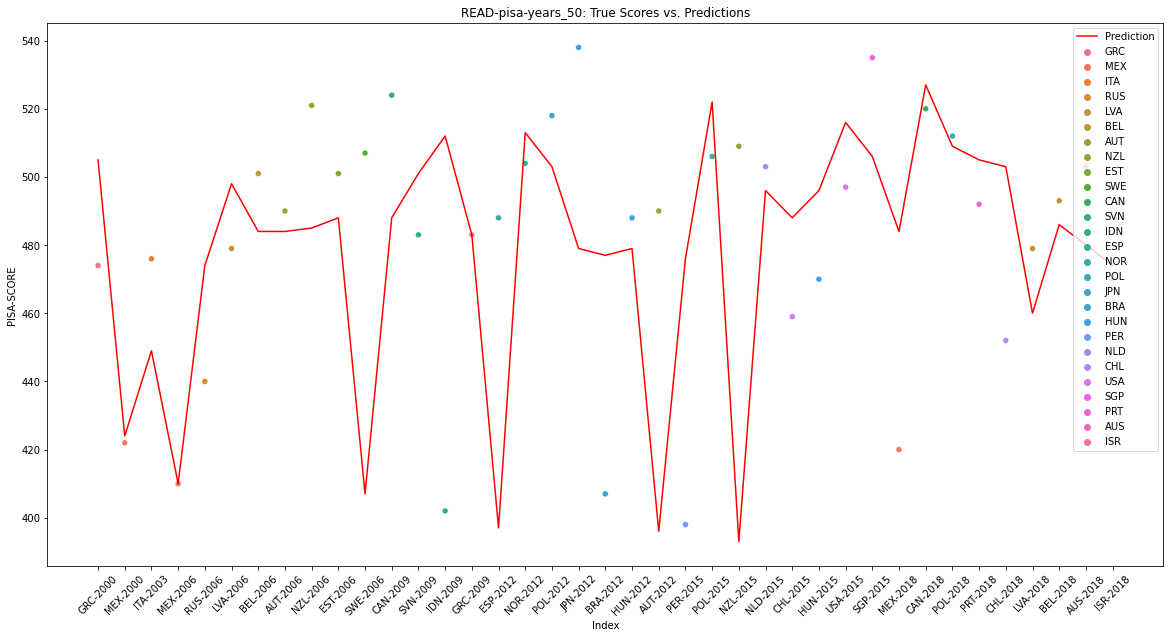

In [29]:
###Prediction, True Scores ###
plt.figure(iteration,figsize=(20,10))
sc_plot_predict = sns.scatterplot(test_plot.index, test_plot["PISA-SCORE"],
                              hue=test_plot["COUNTRY"])
plt.xticks(rotation=45)
plt.plot(y_predict, c="r", label = "Prediction")
plt.legend(loc=1)
plt.title(f"{pisa_type}-{input_data}_{iteration}: True Scores vs. Predictions")
plt.show()
plt.close()

In [31]:
# store model-run data
results = X_test_final.copy()
results = results.drop(columns=feature_columns)
results["Modelrun"] = model_run
results = results.merge(data_for_model[["COUNTRY", "YEAR"]], on="Index")
results["PISA-SCORE"] = y_test_final
results["y_predict"] = y_predict
results["Absoloute Error"] = abs(results["PISA-SCORE"]-results["y_predict"])
results["Squared Error"] = abs(results["PISA-SCORE"]-results["y_predict"])**2
results["RMSE"] = np.sqrt(results["Squared Error"])
results["R^2"] = np.nan
results

,Modelrun,COUNTRY,YEAR,PISA-SCORE,y_predict,Absoloute Error,Squared Error,RMSE,R^2
Index,,,,,,,,,
CAN-2009,Example,CAN,2009,524.0,505.0,19.0,361.0,19.0,NaN
MEX-2006,Example,MEX,2006,410.0,424.0,14.0,196.0,14.0,NaN
RUS-2006,Example,RUS,2006,440.0,449.0,9.0,81.0,9.0,NaN
MEX-2018,Example,MEX,2018,420.0,410.0,10.0,100.0,10.0,NaN
POL-2012,Example,POL,2012,518.0,474.0,44.0,1936.0,44.0,NaN
USA-2015,Example,USA,2015,497.0,498.0,1.0,1.0,1.0,NaN
LVA-2006,Example,LVA,2006,479.0,484.0,5.0,25.0,5.0,NaN
ISR-2018,Example,ISR,2018,470.0,484.0,14.0,196.0,14.0,NaN
AUT-2006,Example,AUT,2006,490.0,485.0,5.0,25.0,5.0,NaN


In [32]:
# overall information about model
new_row_df = pd.DataFrame(columns=["Modelrun", "COUNTRY", "PISA-SCORE", "y_predict", "Absoloute Error", "Squared Error", "RMSE", "R^2"],
                       data=[[model_run, np.nan, np.nan, np.nan, sklearn.metrics.mean_absolute_error(y_test_final, y_predict),
                        sklearn.metrics.mean_squared_error(y_test_final, y_predict),
                        np.sqrt(sklearn.metrics.mean_squared_error(y_test_final, y_predict)),
                        model_tree.score(X_test_final, y_test_final)]], index=[model_run])
new_row_df

,Modelrun,COUNTRY,PISA-SCORE,y_predict,Absoloute Error,Squared Error,RMSE,R^2
Example,Example,NaN,NaN,NaN,12.538462,296.487179,17.218803,0.781063


In [33]:
results_with_total_overview = pd.concat([new_row_df, results])
results_with_total_overview.loc[model_run, "Percentage Test-Data"] = percentage_test_data
results_with_total_overview.loc[model_run, "Optimal_Depth"] = model_tree.get_depth()
results_with_total_overview.loc[model_run, "R2 Training Data"] = model_tree.score(X_train_final, y_train_final)
results_with_total_overview

,Modelrun,COUNTRY,PISA-SCORE,y_predict,Absoloute Error,Squared Error,RMSE,R^2,YEAR,Percentage Test-Data,Optimal_Depth,R2 Training Data
Example,Example,NaN,NaN,NaN,12.538462,296.487179,17.218803,0.781063,NaN,15.0,13.0,1.0
CAN-2009,Example,CAN,524.0,505.0,19.000000,361.000000,19.000000,NaN,2009.0,NaN,NaN,NaN
MEX-2006,Example,MEX,410.0,424.0,14.000000,196.000000,14.000000,NaN,2006.0,NaN,NaN,NaN
RUS-2006,Example,RUS,440.0,449.0,9.000000,81.000000,9.000000,NaN,2006.0,NaN,NaN,NaN
MEX-2018,Example,MEX,420.0,410.0,10.000000,100.000000,10.000000,NaN,2018.0,NaN,NaN,NaN
POL-2012,Example,POL,518.0,474.0,44.000000,1936.000000,44.000000,NaN,2012.0,NaN,NaN,NaN
USA-2015,Example,USA,497.0,498.0,1.000000,1.000000,1.000000,NaN,2015.0,NaN,NaN,NaN
LVA-2006,Example,LVA,479.0,484.0,5.000000,25.000000,5.000000,NaN,2006.0,NaN,NaN,NaN
ISR-2018,Example,ISR,470.0,484.0,14.000000,196.000000,14.000000,NaN,2018.0,NaN,NaN,NaN
AUT-2006,Example,AUT,490.0,485.0,5.000000,25.000000,5.000000,NaN,2006.0,NaN,NaN,NaN


In [39]:
# get tree information - iterate through the nodes of the Tree
# merge with information about the feature
# store as representation of tree
total_nodes = model_tree.tree_.node_count
features = pd.DataFrame()
feature_columns = list(X.columns)
for node_id in range(0, total_nodes):
    if model_tree.tree_.feature[node_id] == -2: # id of all Leaf nodes
        features.loc[node_id, "Feature"] = "Leaf"
        features.loc[node_id, "Threshold"] = np.nan
    else:
        features.loc[node_id, "Feature"] = feature_columns[model_tree.tree_.feature[node_id]]
        features.loc[node_id, "Threshold"] = model_tree.tree_.threshold[node_id]
    features.loc[node_id, "Samples"] = model_tree.tree_.n_node_samples[node_id]
    features.loc[node_id, "Value"] = model_tree.tree_.value[node_id][0]
features_merged = features.merge(column_information, how="left", left_on="Feature", right_index=True)
features_merged = features_merged.set_index("Feature")
features_merged

,Threshold,Samples,Value,NA-Values,NA-Values [%],Inpolated,Inpolated [%],Annual Mean,Annual Mean [%]
Feature,,,,,,,,,
"GREEN_GROWTH - : Energy intensity, TPES per capita [Units Tonnes of oil equivalent (toe)]",1.840521,221.0,486.619910,4.0,1.538462,1.0,0.384615,3.0,1.153846
LFS_SEXAGE_I_R - : Men + 20 to 24 + Employment/population ratio [Units Percentage],61.571884,29.0,418.931034,6.0,2.307692,1.0,0.384615,5.0,1.923077
NRR - : Couple without children - partner's earnings: 67% of the AW + 9 + Average Wage + No + No [],65.500000,8.0,455.250000,81.0,31.153846,32.0,12.307692,49.0,18.846154
USLHRS_D - : Men + 20 to 24 + Total employment + 1 to 19 hours [Thousands Persons],17.500000,4.0,444.750000,49.0,18.846154,28.0,10.769231,21.0,8.076923
"STLABOUR - Level, rate or quantity series, s.a. : Unemployed population, Aged 15 and over, Males [Thousands Persons]",485.119400,2.0,441.500000,96.0,36.923077,0.0,0.000000,96.0,36.923077
...,...,...,...,...,...,...,...,...,...
Leaf,NaN,6.0,508.833333,NaN,NaN,NaN,NaN,NaN,NaN
Leaf,NaN,13.0,501.307692,NaN,NaN,NaN,NaN,NaN,NaN
TENURE_DIS - : Women + 15 to 19 + Total employment + Total [Thousands Employed],67.919704,22.0,496.636364,95.0,36.538462,47.0,18.076923,48.0,18.461538


In [45]:
# create Robustness Information
# Identify how often the different features appear in relation to the training samples in the tree
# sort according to samples - importance of that feature pursumed by the total number of samples at the feature
robust_check = features.drop(columns=["Threshold", "Value"], axis=1)
robust_check = robust_check.groupby("Feature").sum() # sum up the number of samples at nodes of the feature
robust_check = robust_check.sort_values("Samples", ascending=False)
robust_check = robust_check.drop("Leaf") # drop leaf node - not relevant to feature analysis
robust_check = robust_check.merge(column_information, how="left", left_on="Feature", right_index=True)

# calculate how affected the samples passing through the node are by the approximation of  na values by the annual mean
robust_check["Robustness - Samples affected by NA [Samples]"] = robust_check["Samples"] * robust_check["NA-Values [%]"] / 100
robust_check["Robustness - Samples affected by Annual Mean [Samples]"] = robust_check["Samples"] * robust_check["Annual Mean [%]"] / 100
robust_check

,Samples,NA-Values,NA-Values [%],Inpolated,Inpolated [%],Annual Mean,Annual Mean [%],Robustness - Samples affected by NA [Samples],Robustness - Samples affected by Annual Mean [Samples]
Feature,,,,,,,,,
"GREEN_GROWTH - : Energy intensity, TPES per capita [Units Tonnes of oil equivalent (toe)]",221.0,4.0,1.538462,1.0,0.384615,3.0,1.153846,3.400000,2.550000
EAG_TRANS - Share of population by education and labour force status Value : Men + 15-24 years + Other employed [Units],192.0,56.0,21.538462,37.0,14.230769,19.0,7.307692,41.353846,14.030769
TIM_2019_MAIN - Domestic compensation of employees content of gross exports : France + Fabricated metal products [Millions US Dollar],116.0,113.0,43.461538,96.0,36.923077,17.0,6.538462,50.415385,7.584615
TIM_2019_MAIN - Share of domestic employment embodied in exports of final products : World + Mining support service activities [Units Percentage],76.0,110.0,42.307692,103.0,39.615385,7.0,2.692308,32.153846,2.046154
TIM_2019_MAIN - Domestic compensation of employees content of gross exports : Finland + Total business sector services [Millions US Dollar],67.0,109.0,41.923077,99.0,38.076923,10.0,3.846154,28.088462,2.576923
...,...,...,...,...,...,...,...,...,...
PTRUB - : Couple with 2 children - partner's earnings: Minimum Wage + 2 + Average Wage + No + No + Yes [],2.0,120.0,46.153846,29.0,11.153846,91.0,35.000000,0.923077,0.700000
NRR - : Couple with 2 children - partner's earnings: 67% of the AW + 8 + Minimum Wage + Yes + No [],2.0,121.0,46.538462,31.0,11.923077,90.0,34.615385,0.930769,0.692308
IOTSI4_2018 - : Domestic output and imports + Telecommunications + Chemicals and pharmaceutical products [Millions US Dollar],2.0,105.0,40.384615,102.0,39.230769,3.0,1.153846,0.807692,0.023077


In [ ]:
###Export trees both with and without feature names####
export_graphviz(model_tree, out_file=f"{pisa_type}-{iteration}_Tree_{model_run}_with_names.dot", feature_names=feature_columns)
export_graphviz(model_tree, out_file=f"{pisa_type}-{iteration}_Tree_{model_run}.dot")

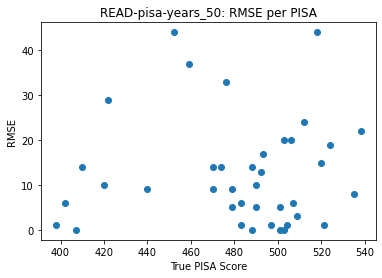

In [46]:
### Show abs. error per pisa score ###
# see whether there is potential for improvement in specific areas of the pisa score
plt.figure()
plt.scatter(results["PISA-SCORE"], results["RMSE"])
plt.xlabel("True PISA Score")
plt.ylabel("RMSE")
plt.title(f"{pisa_type}-{input_data}_{iteration}: RMSE per PISA")
plt.show()
plt.close()

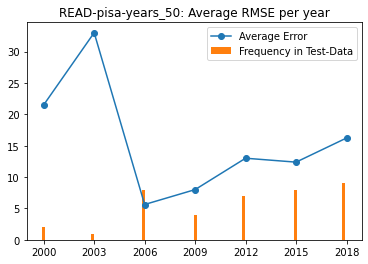

In [48]:
### Average Error per year ###
# identify systematic over/underprediction on yearly basis taking the frequency of the year's appearance into account
plt.figure()
tmp = results[["YEAR", "RMSE"]].groupby("YEAR").mean()
plt.plot(tmp.index, tmp, marker="o", label="Average Error")
plt.hist(results["YEAR"], bins=100, align="left", label="Frequency in Test-Data")
plt.xticks(tmp.index)
plt.legend()
plt.title(f"{pisa_type}-{input_data}_{iteration}: Average RMSE per year")
plt.show()
plt.close()

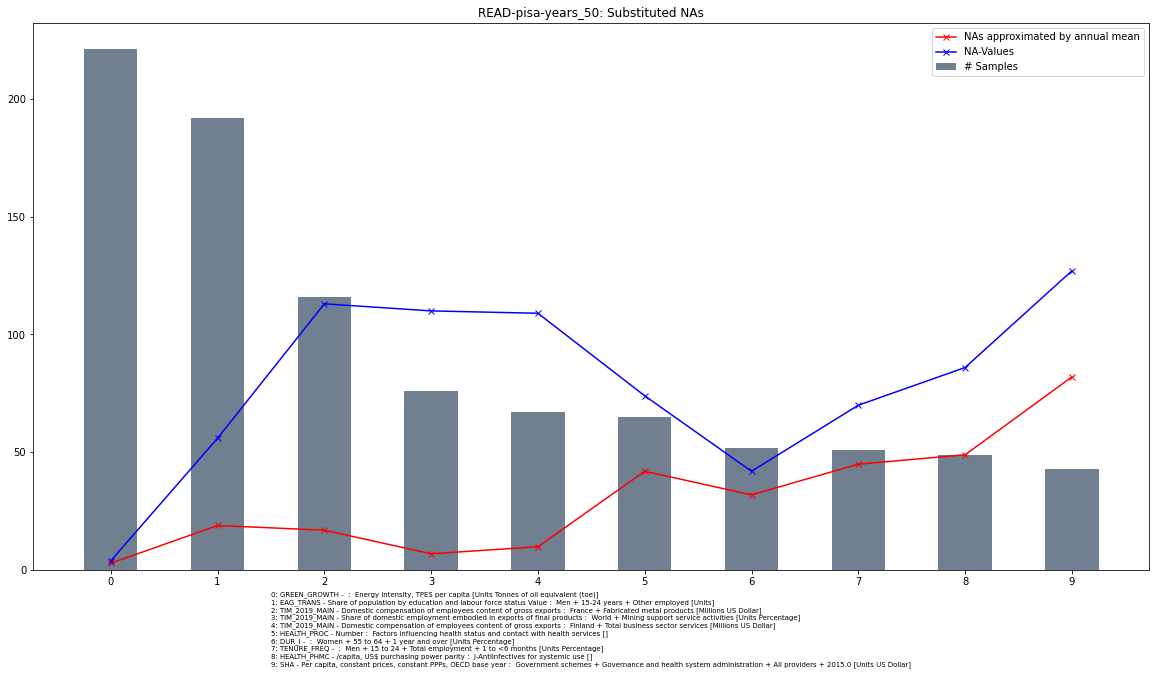

In [68]:
# display robustness of the best features - show how many na values they had and how many of the values were substituted by the annual mean
plt.figure(figsize=(20, 20))
data = robust_check[:10].copy()
feature_names = robust_check.index.to_list()[:10]
feature_names = [f"{x}: {feature_names[x]}" for x in range(len(feature_names))]
feature_names = "\n".join(feature_names)

plt.plot(range(len(data)), data["Annual Mean"], marker="x", c="r", label="NAs approximated by annual mean")
plt.plot(range(len(data)), data["NA-Values"], marker="x", c="b", label="NA-Values")
plt.hist(data.index, bins=range(len(data)+1), color="slategray", align="left", rwidth=0.5,
         weights=data["Samples"], label="# Samples")
plt.legend()
plt.xticks(range(len(data.index)), range(len(data)));
plt.xlabel(feature_names, fontsize="x-small", ma="left")
plt.gcf().subplots_adjust(bottom=0.5)
plt.title(f"{pisa_type}-{input_data}_{iteration}: Substituted NAs")
plt.show()
plt.close()

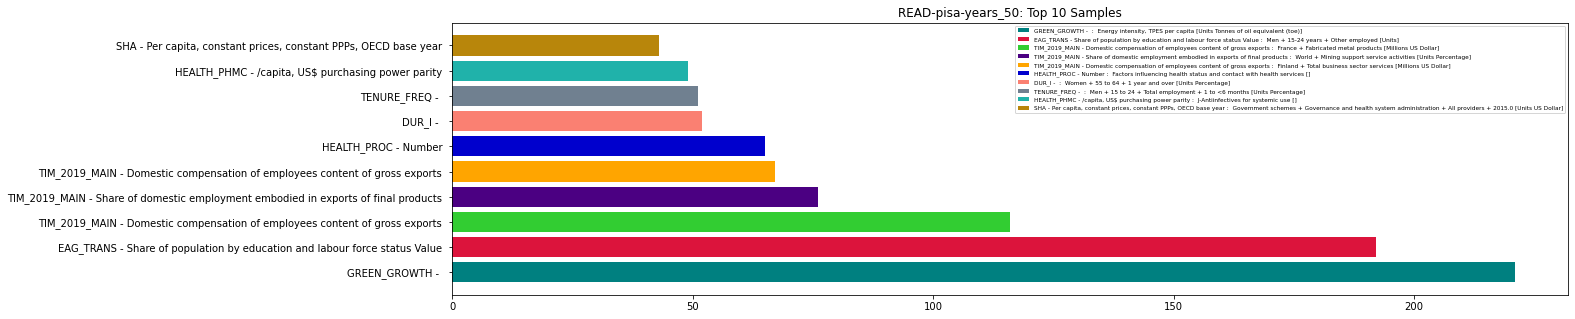

In [70]:
# get overview of features with most samples in tree
colors = ["teal", "crimson", "limegreen", "indigo", "orange", "mediumblue", "salmon",
                      "slategray", "lightseagreen", "darkgoldenrod"]
data["name"] = [x.split(":")[0] for x in data.index]
data["labels"] = [str(x) for x in range(len(data) )]
data["color"] = colors[:len(data)]

fig = plt.figure(figsize=(20, 5))
for f in data.index:
    plt.barh(data.loc[f, "labels"], data.loc[f, "Samples"], align="center",
             tick_label=data.loc[f, "name"], color=data.loc[f, "color"])

plt.title(f"{pisa_type}-{input_data}_{iteration}: Top 10 Samples")
plt.legend(labels=data.index, ncol=1, bbox_transform=fig.transFigure, loc="upper right",
           fontsize='xx-small')
plt.yticks(ticks=np.arange(len(data)), labels=data["name"])
plt.show()
plt.close()

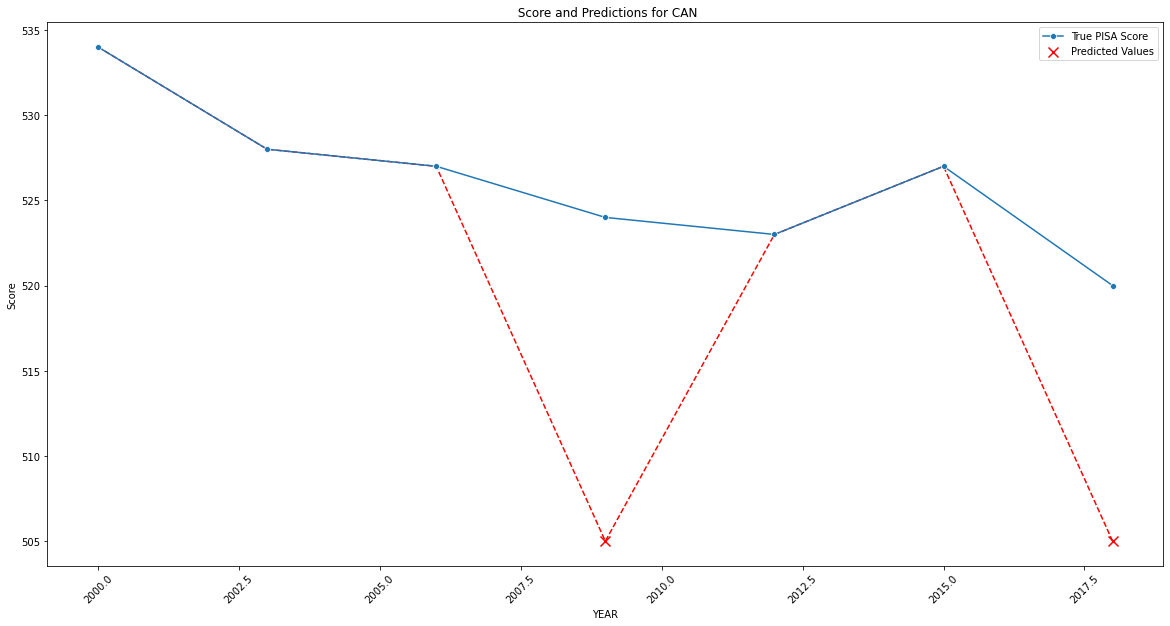

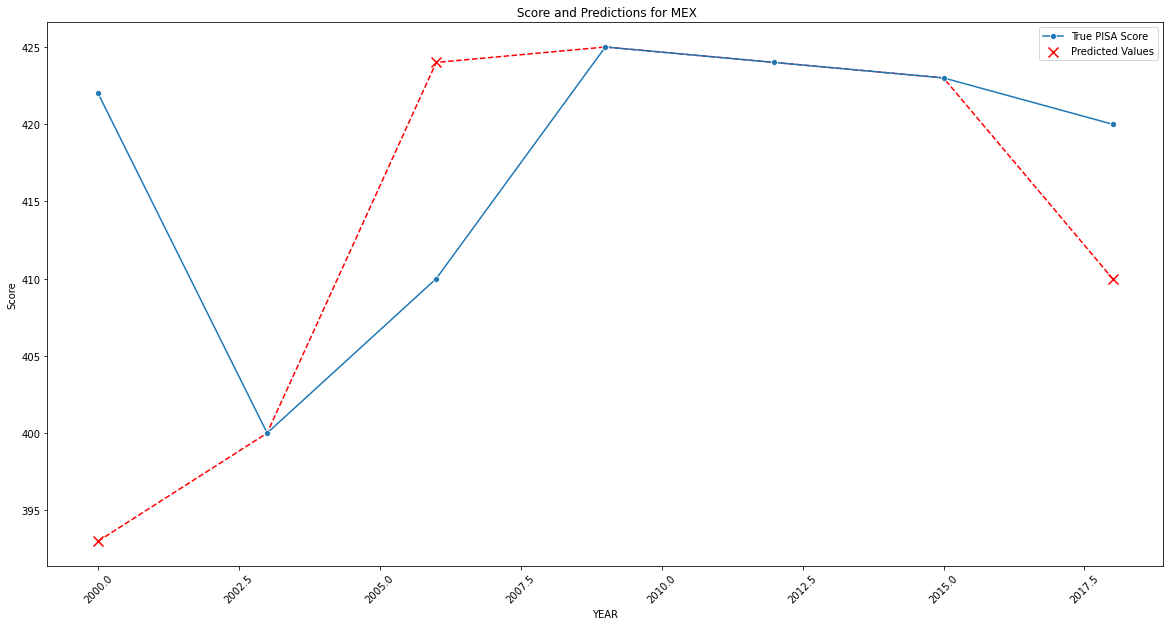

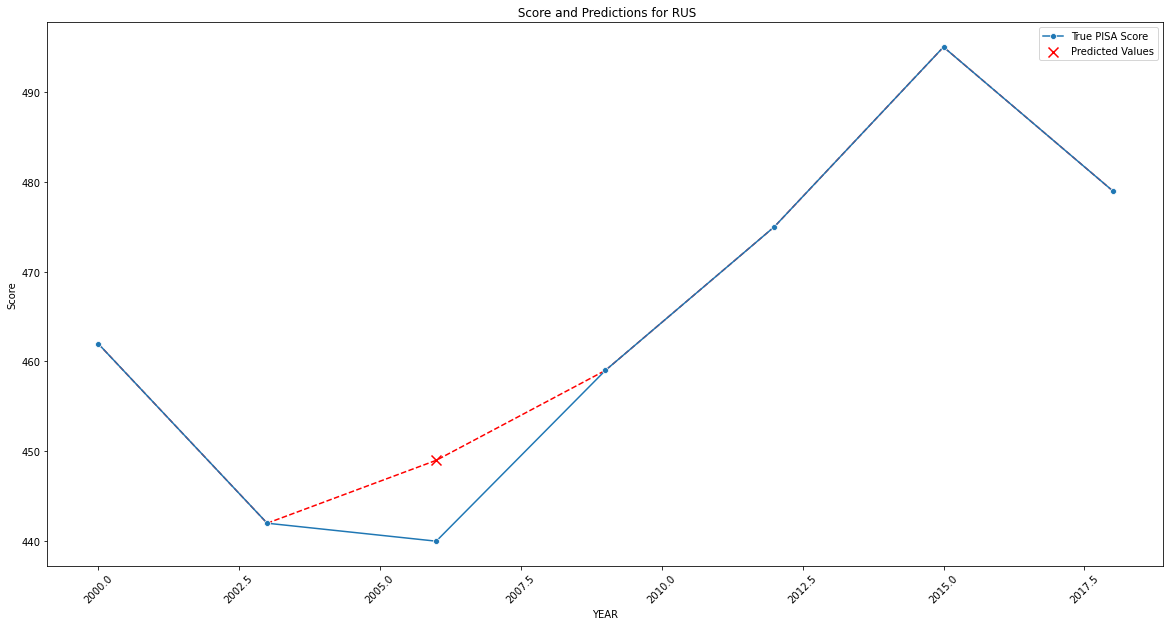

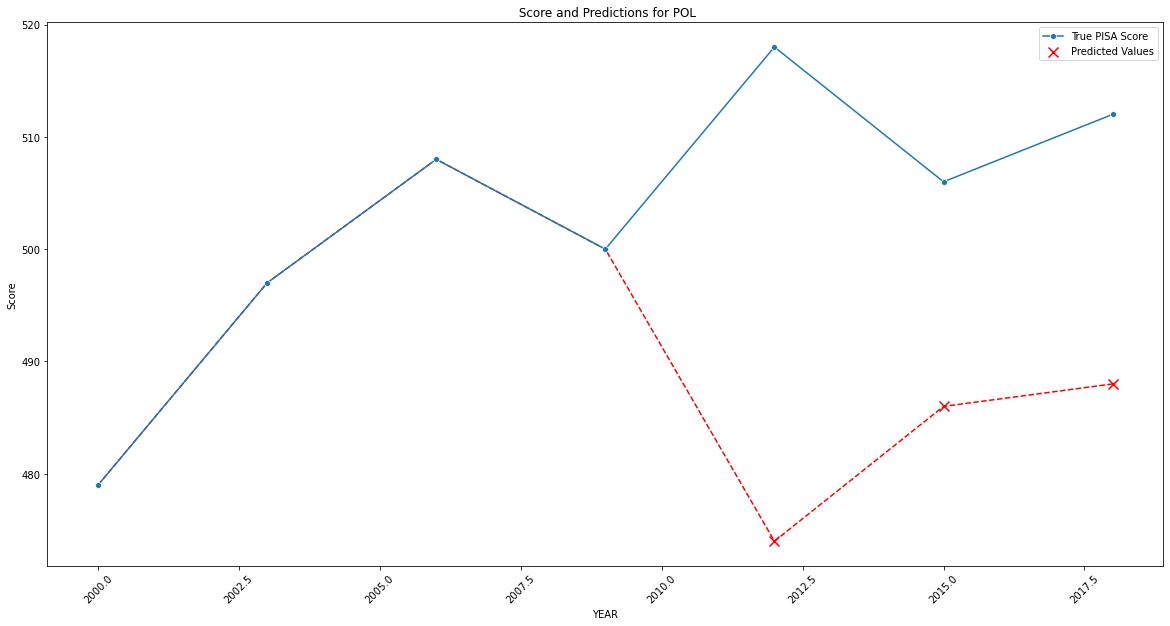

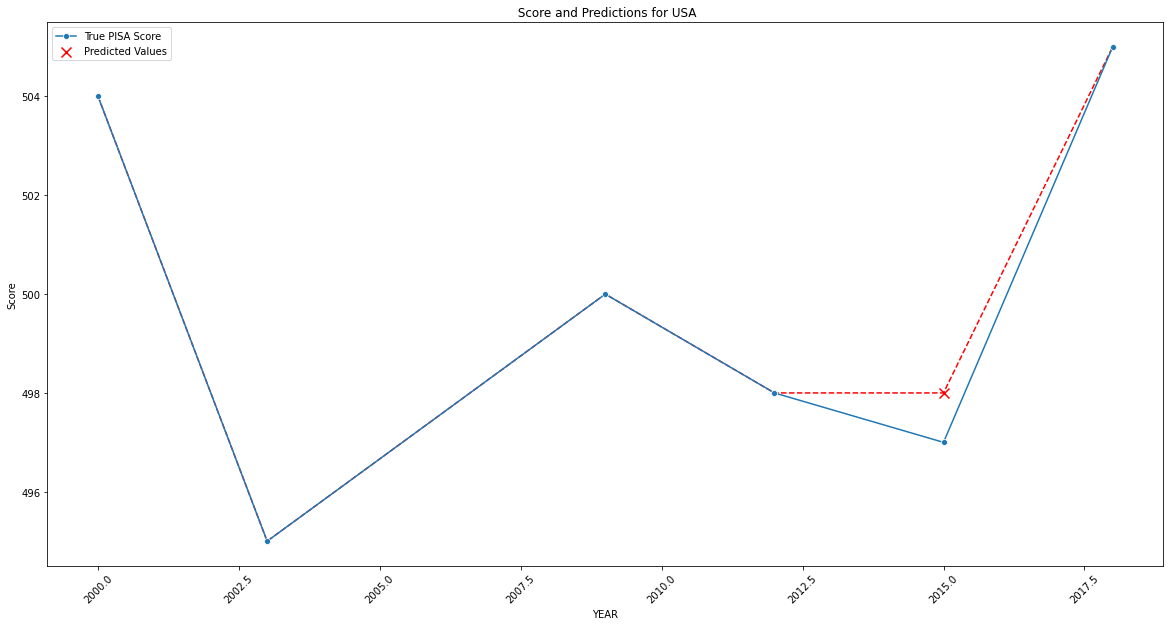

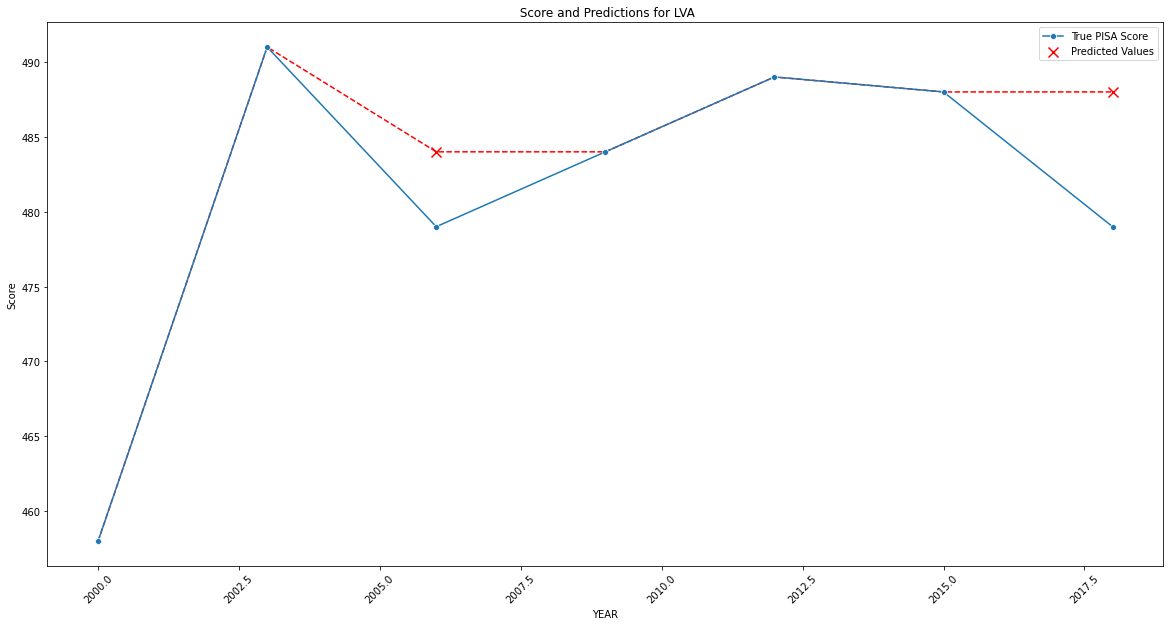

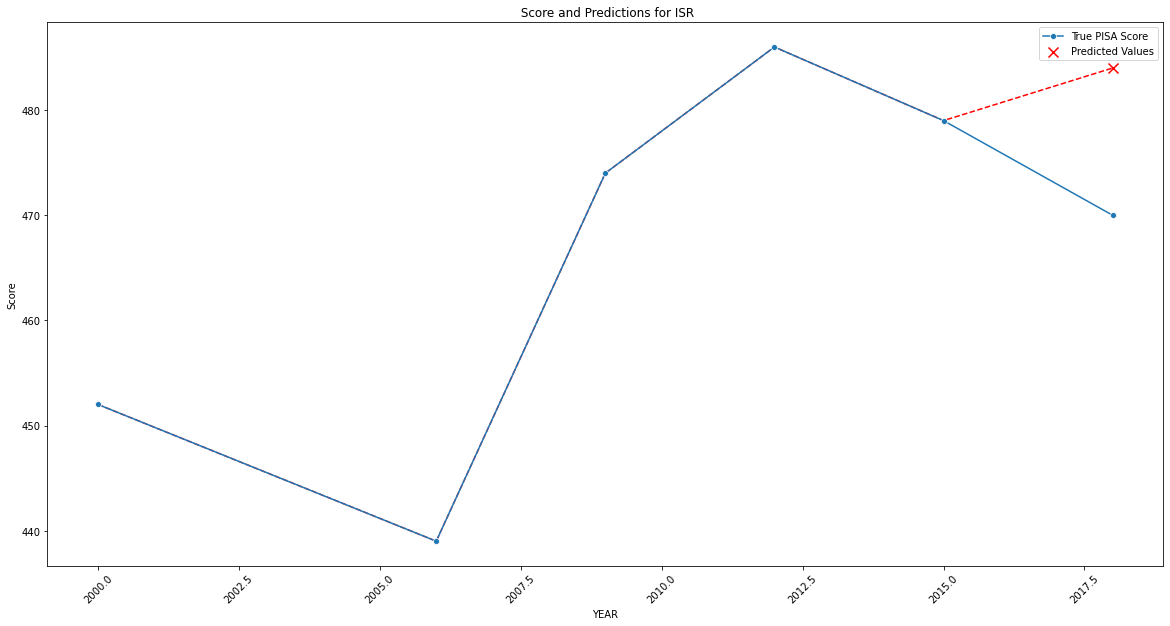

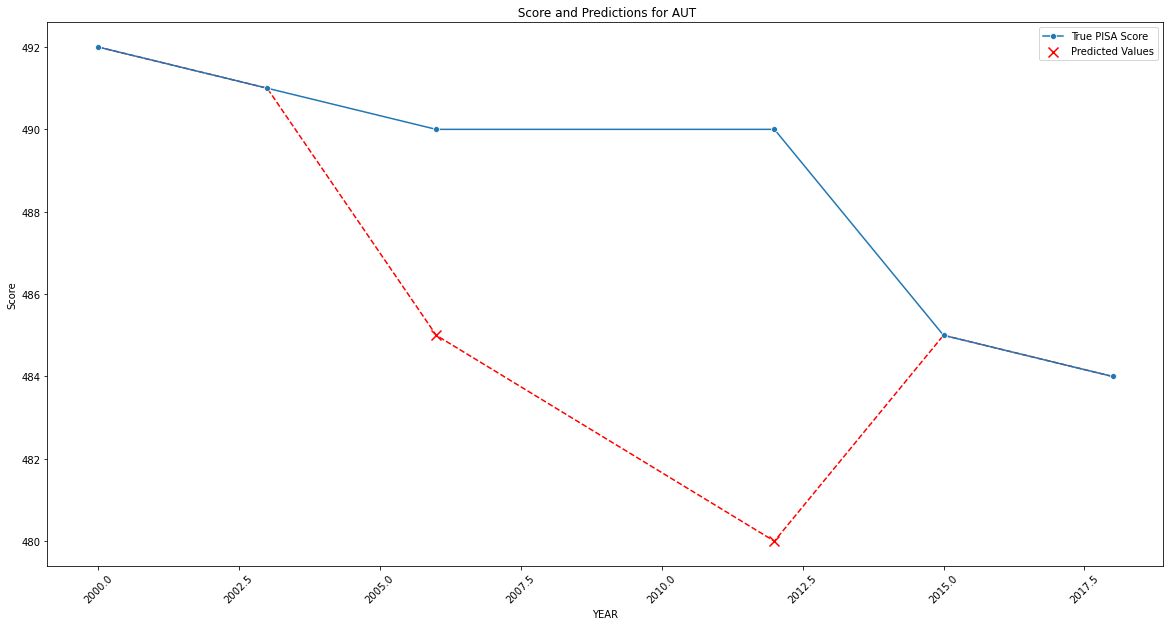

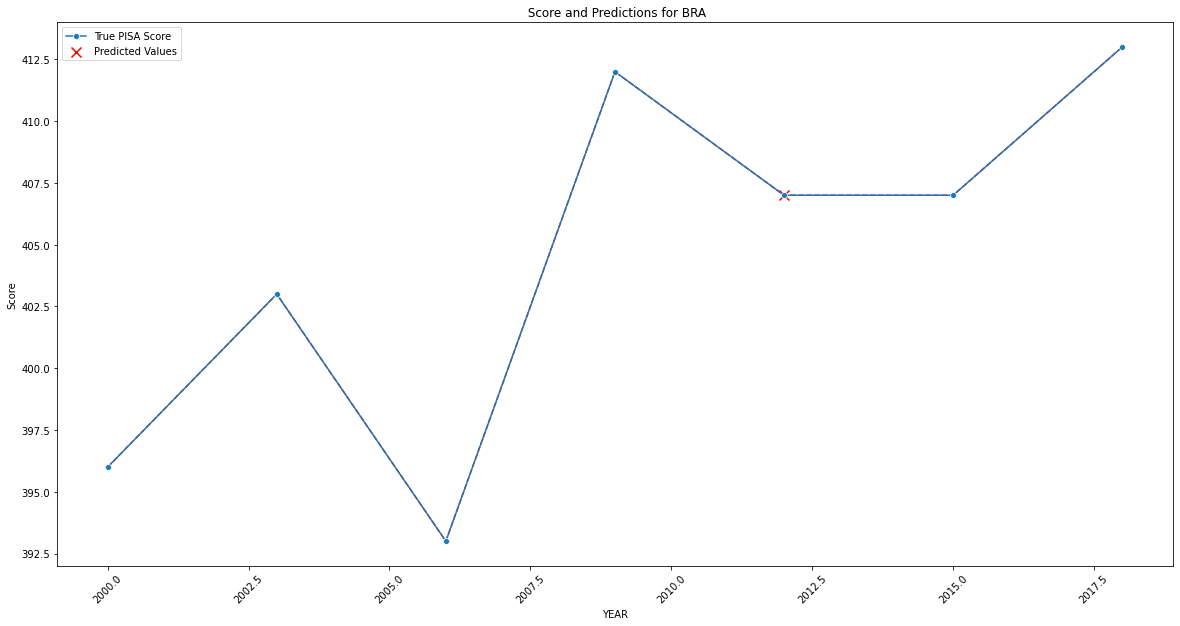

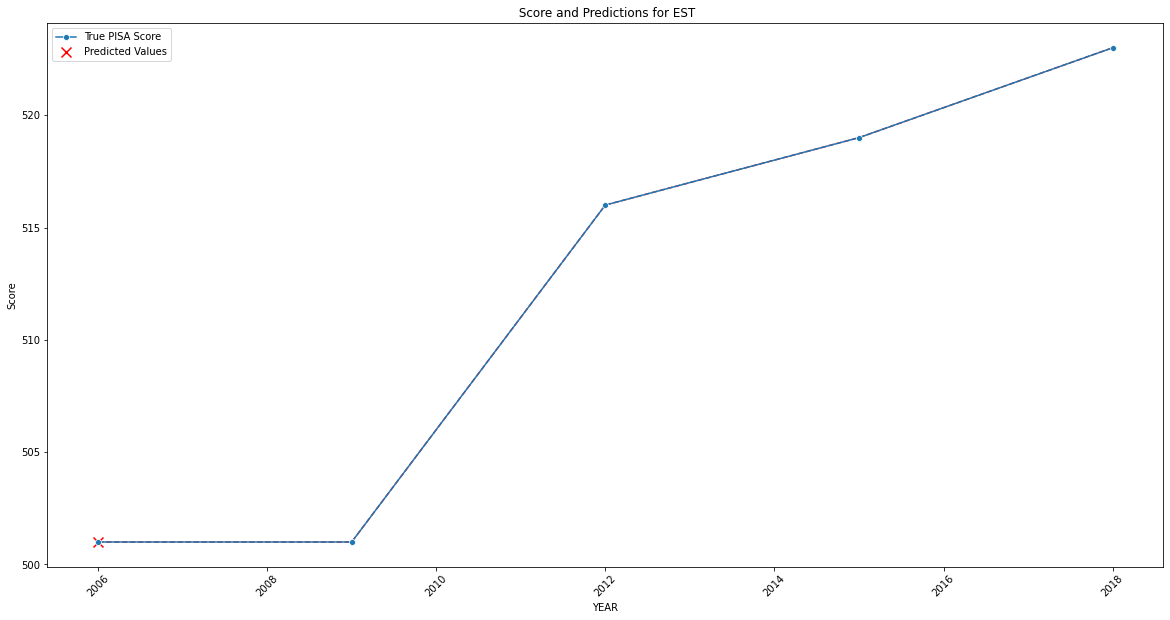

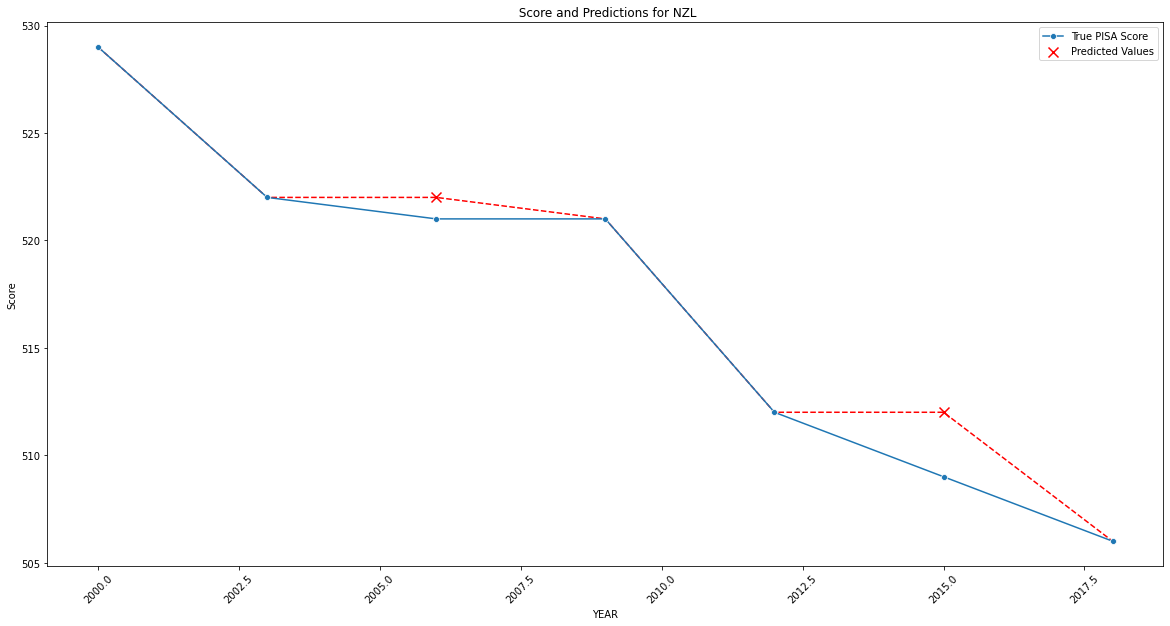

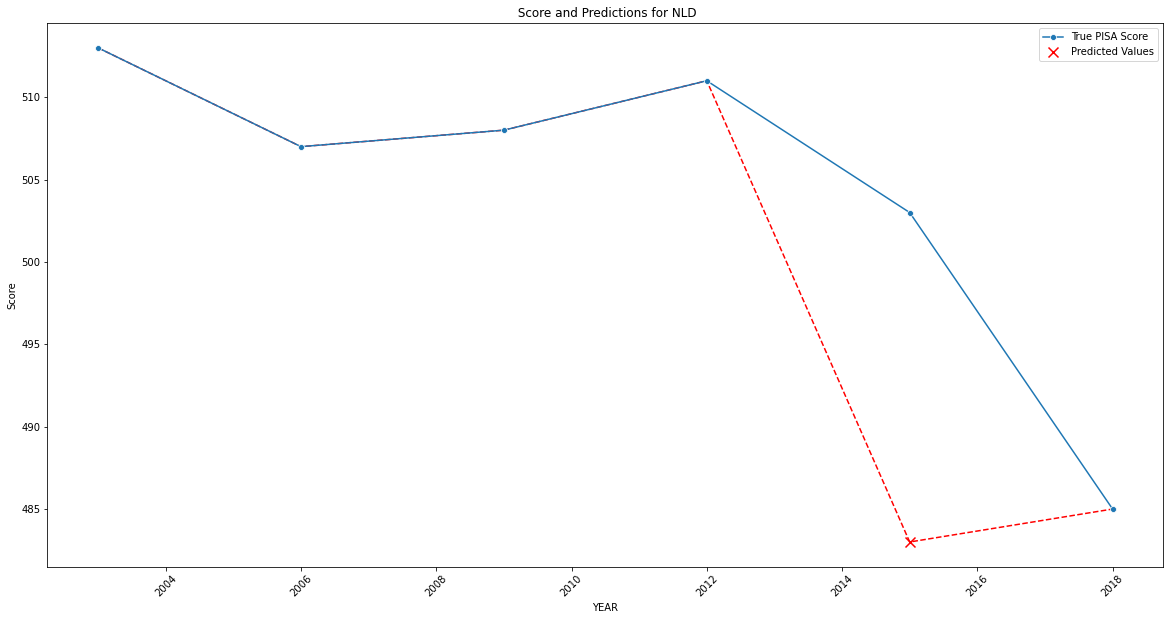

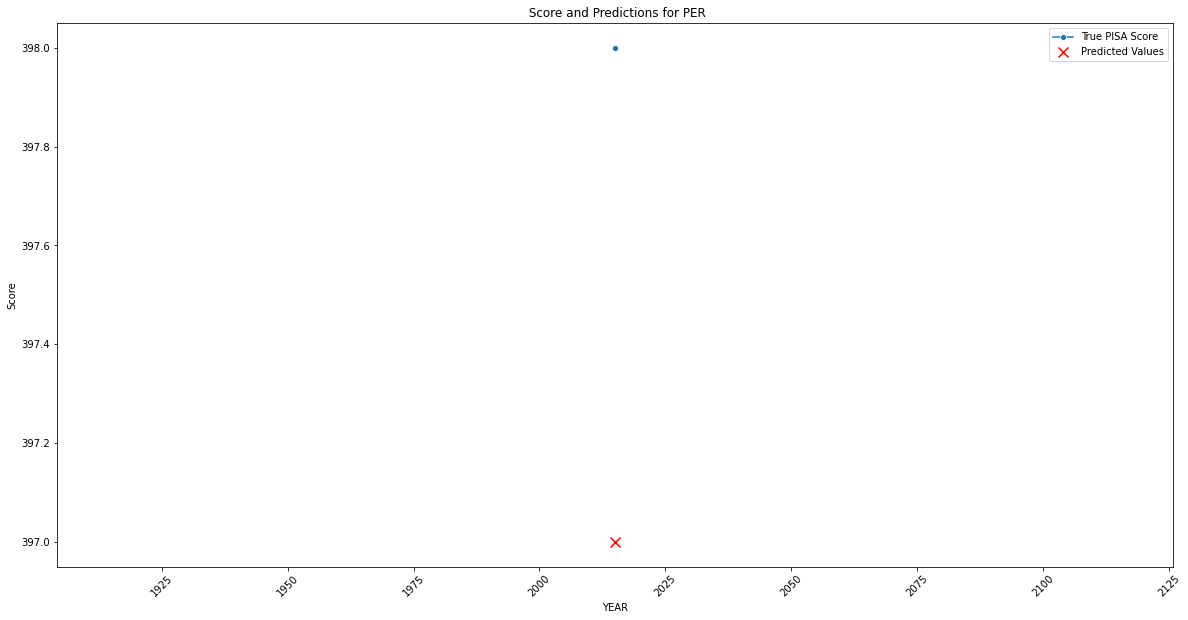

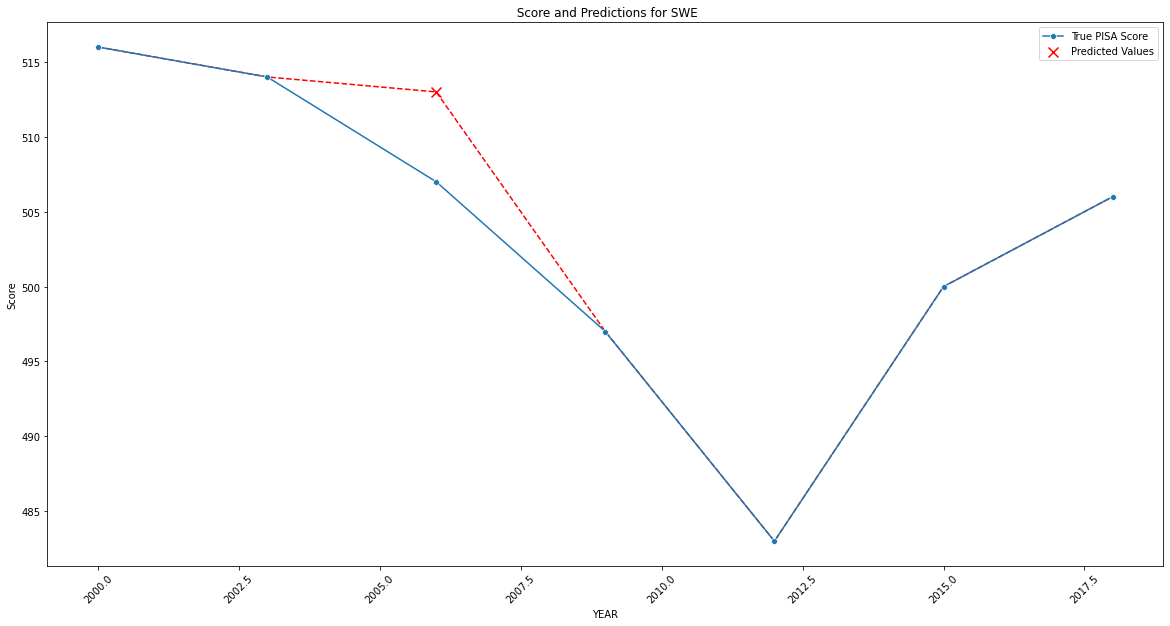

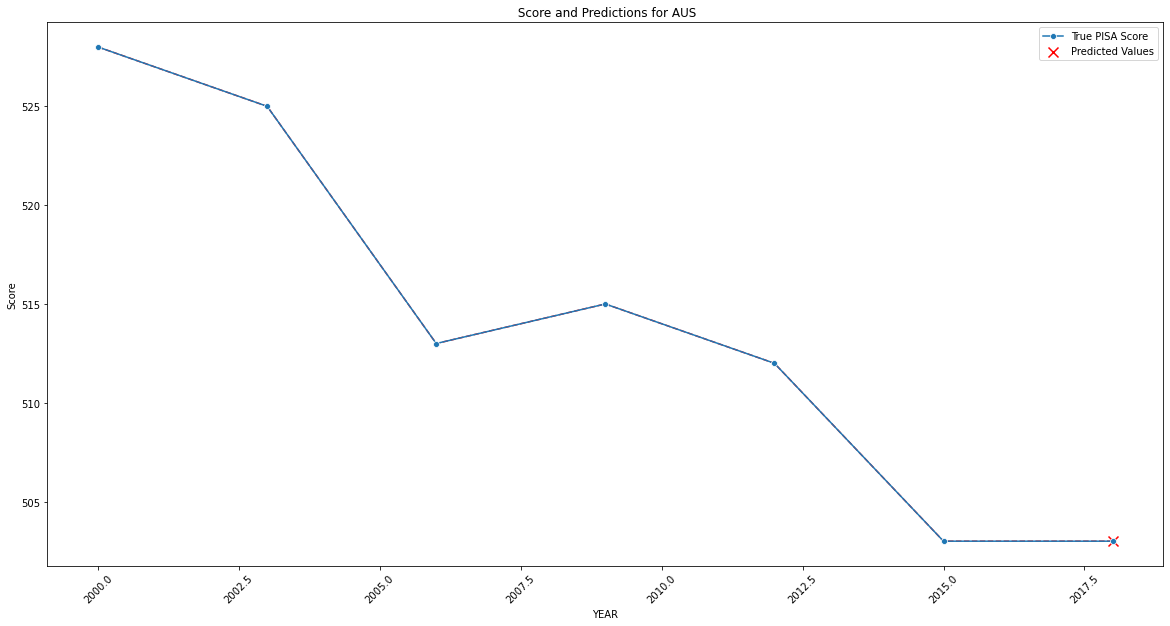

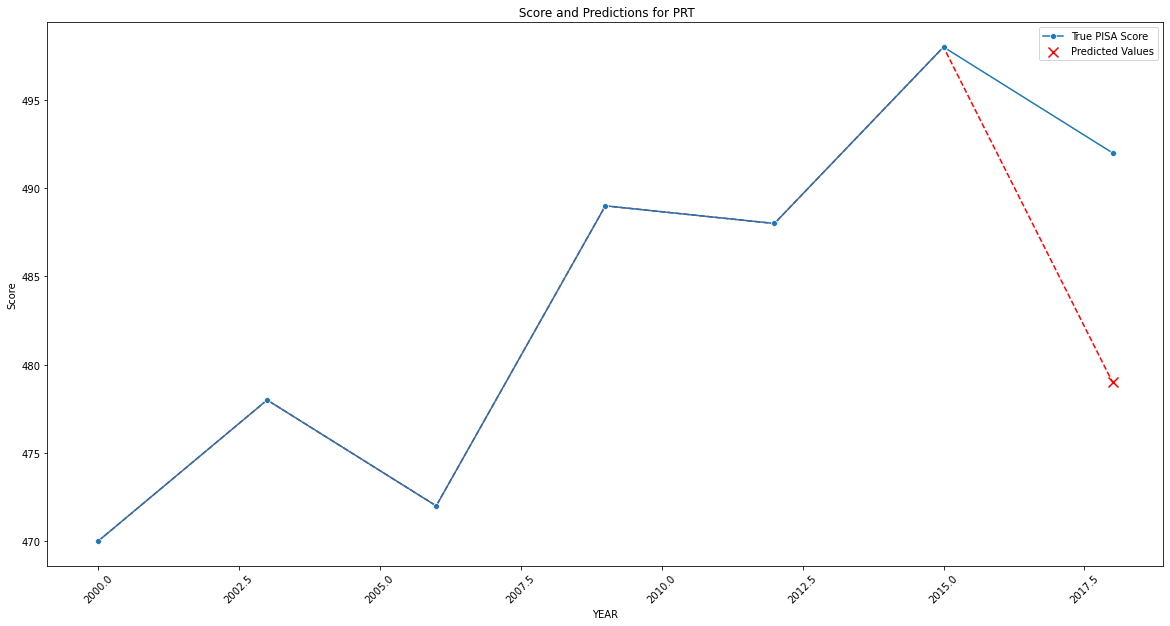

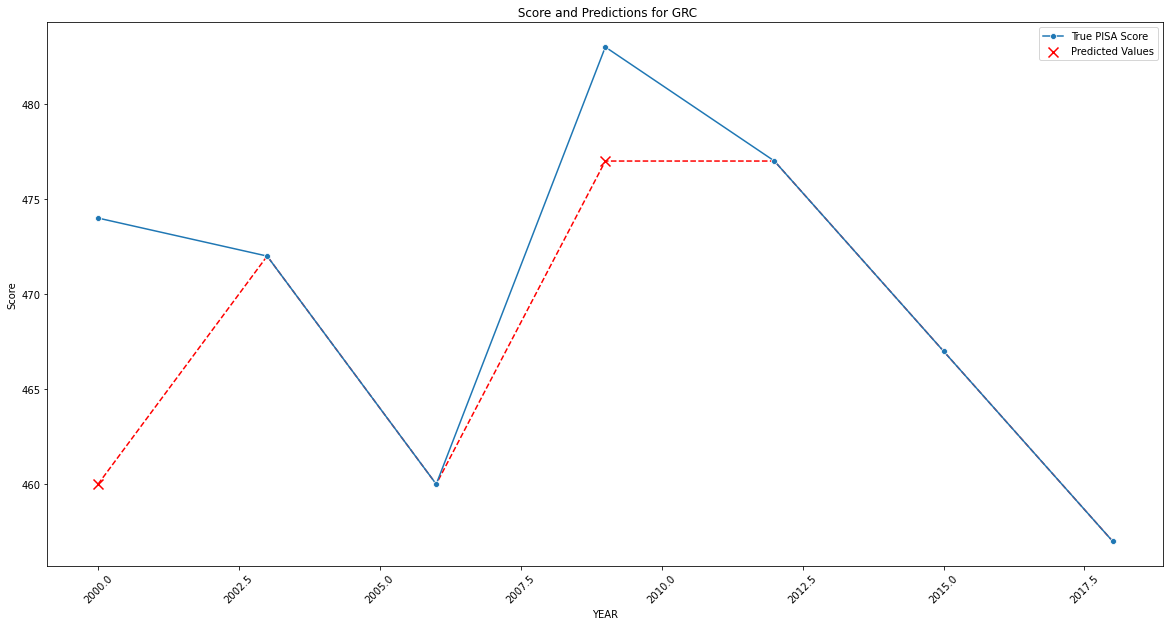

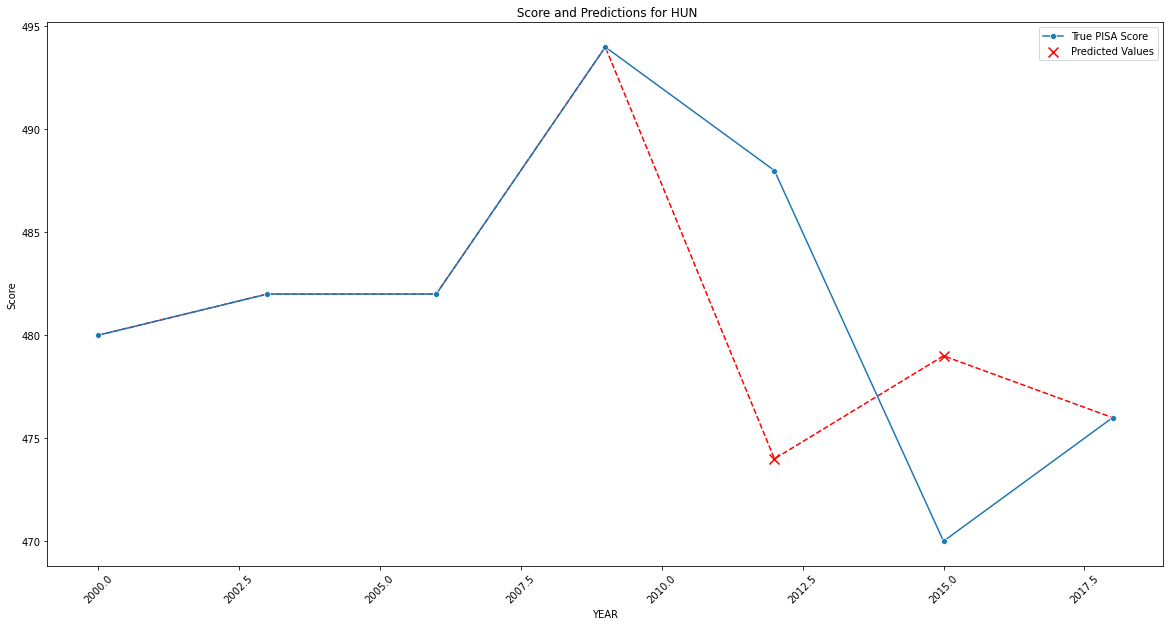

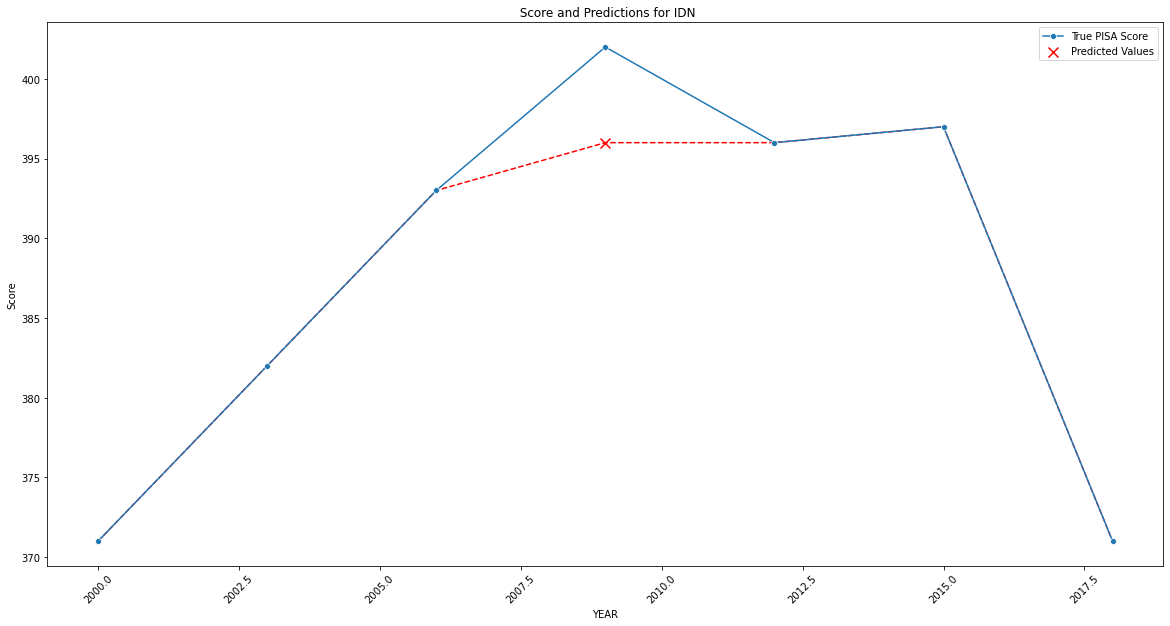

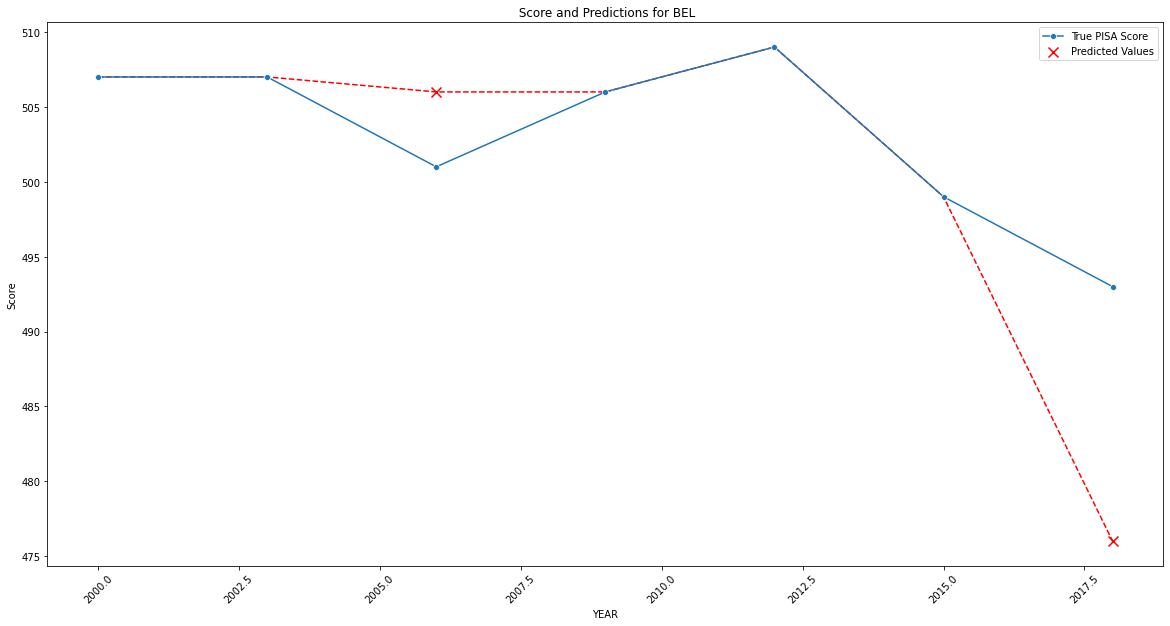

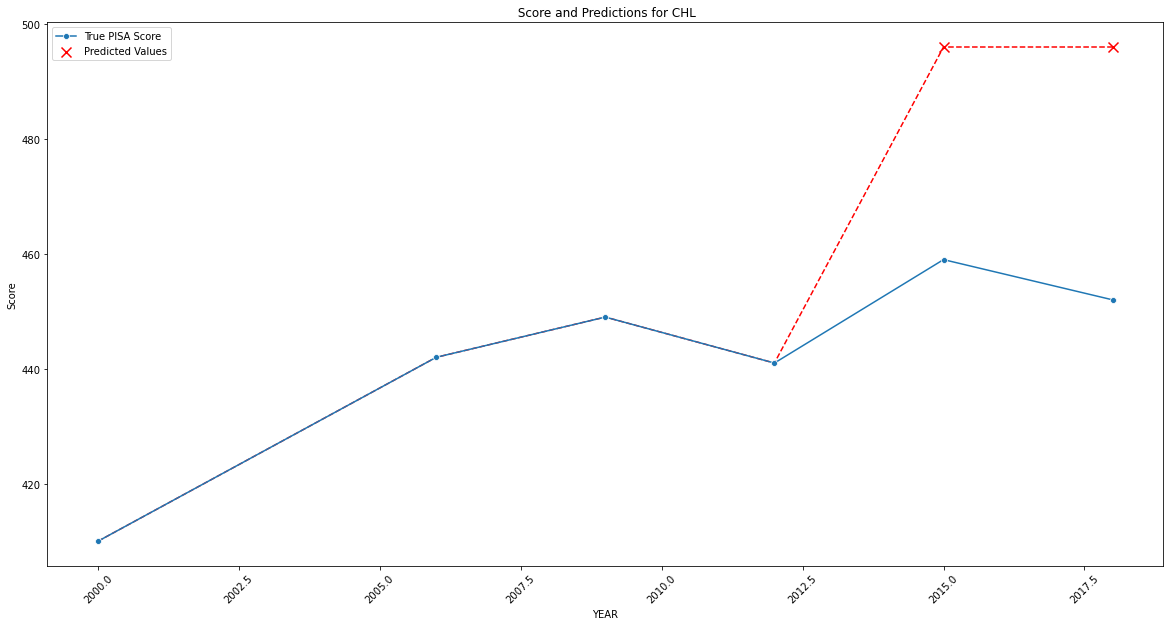

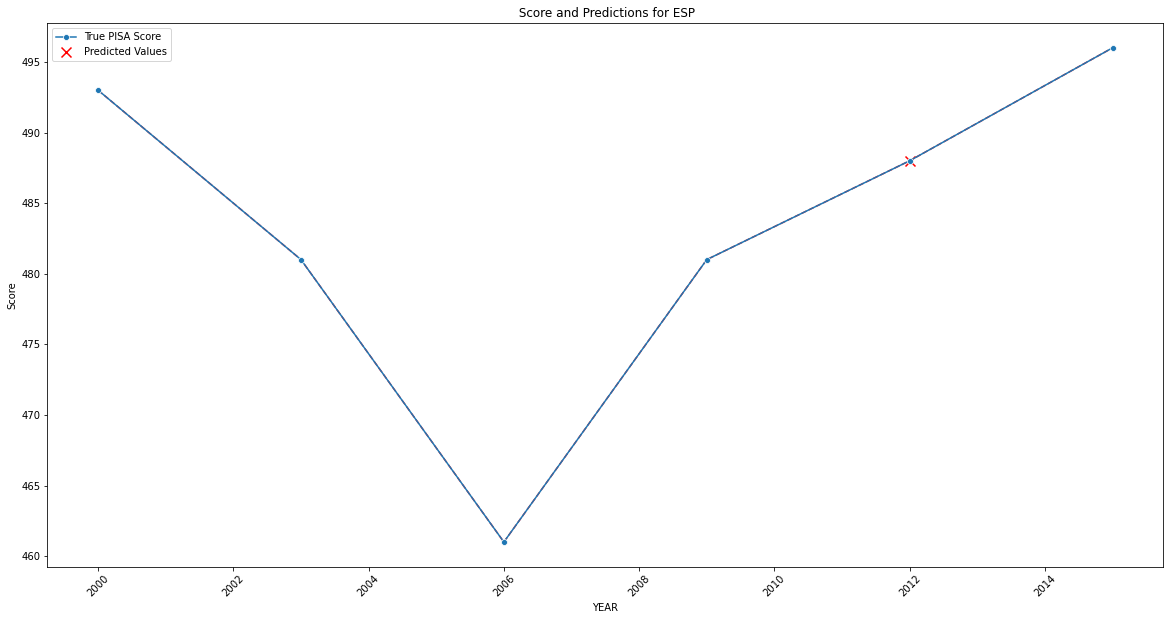

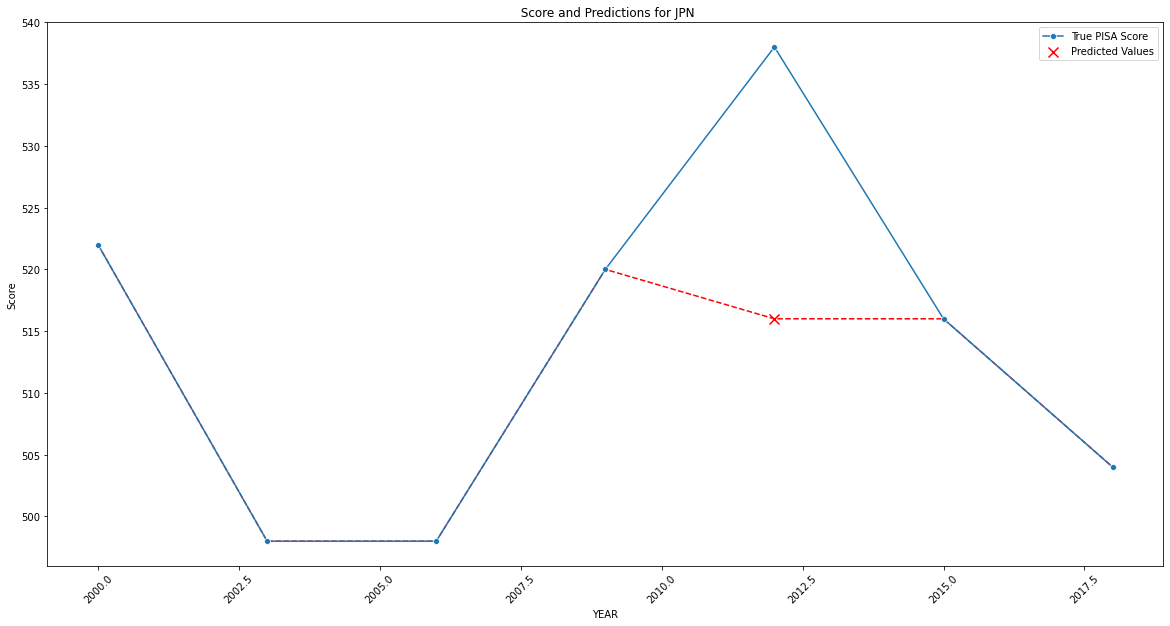

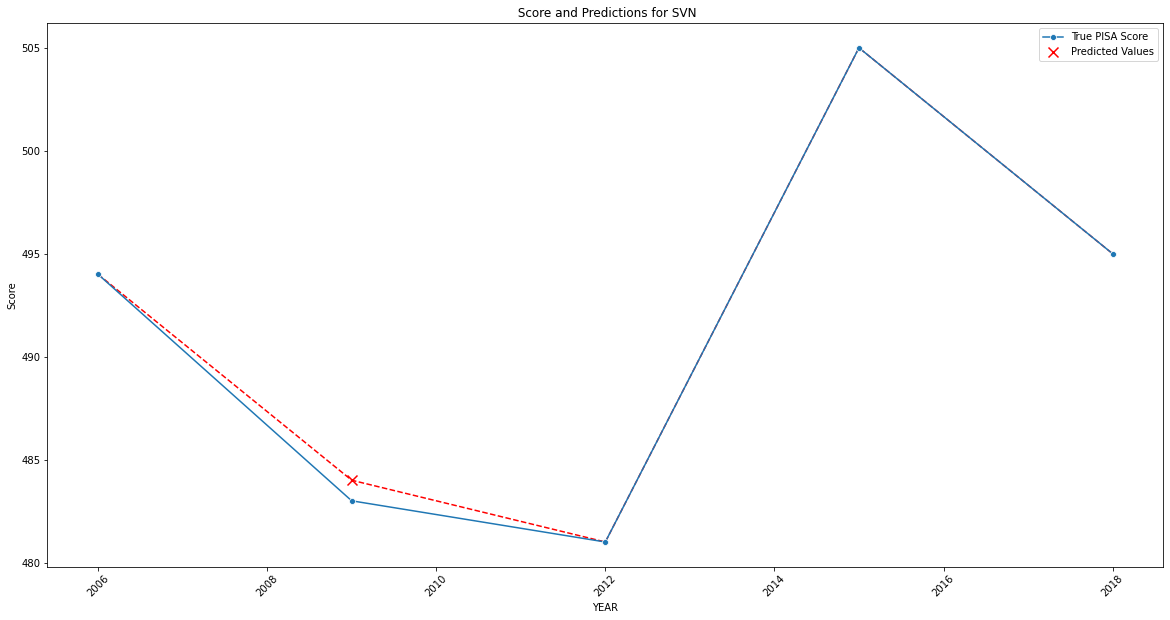

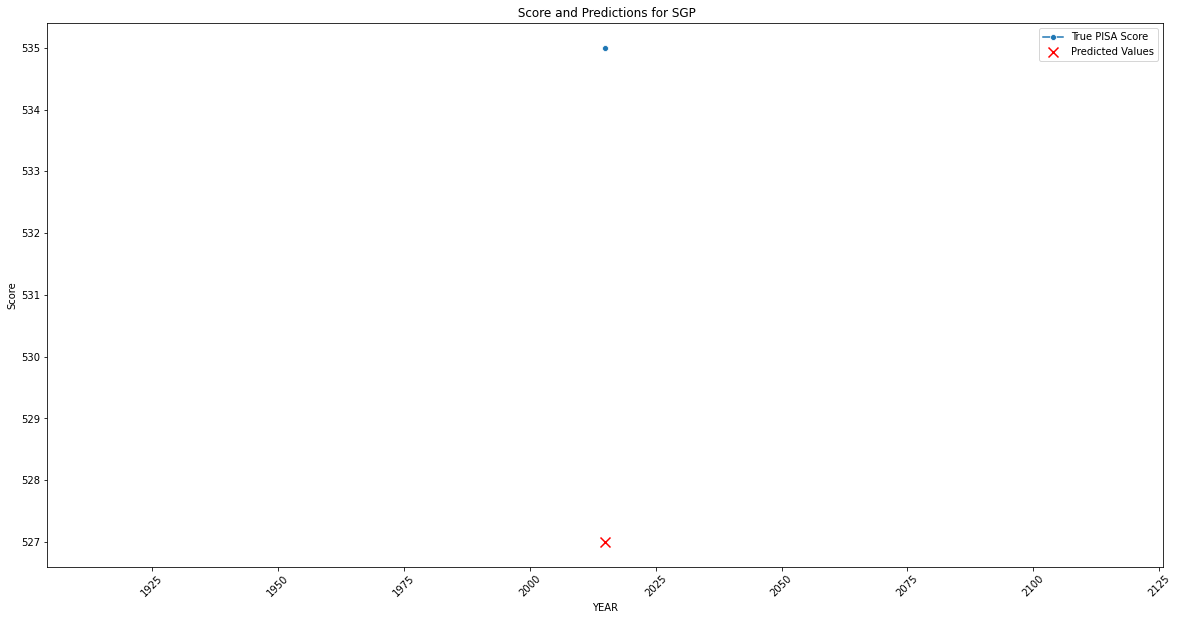

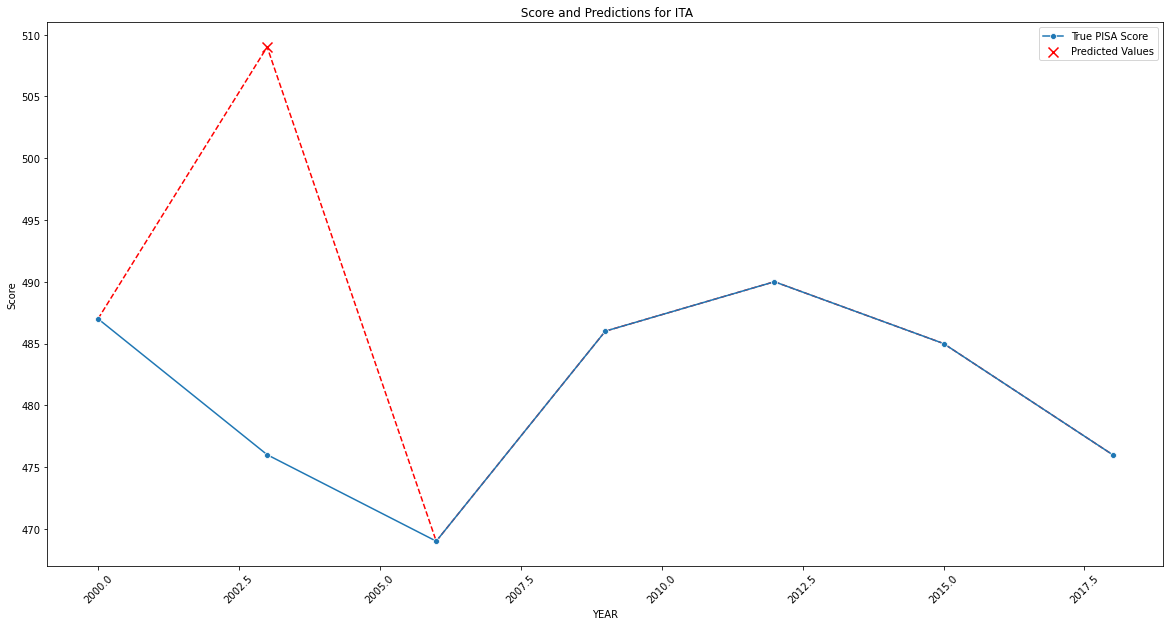

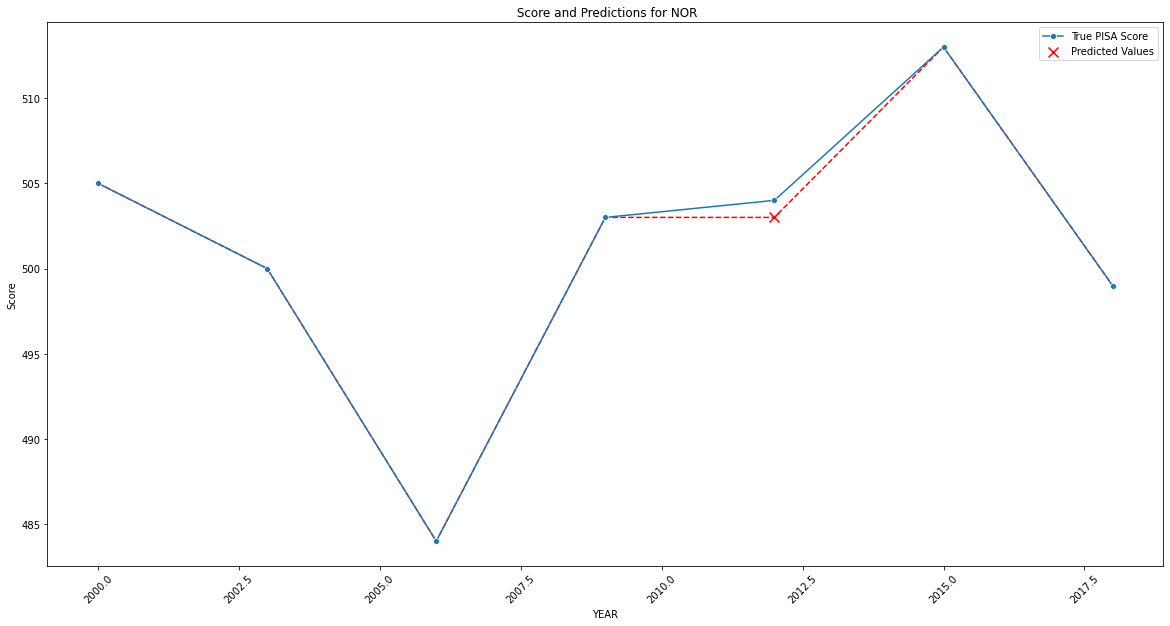

In [71]:
# plot predictions for countries to sidentify systematic over-underprediction on country level
estimated_countries = list(results["COUNTRY"].unique())
estimated_countries_data = data_for_model.loc[data_for_model["COUNTRY"].isin(estimated_countries),
                                             ["PISA-SCORE", "YEAR", "COUNTRY"]]

estimated_countries_data = estimated_countries_data.merge(results["y_predict"], how="left", left_index=True,
                                                      right_index= True)
estimated_countries_data["new_pisa"] = estimated_countries_data["y_predict"]
estimated_countries_data["new_pisa"] = estimated_countries_data["y_predict"].fillna(estimated_countries_data["PISA-SCORE"])
estimated_countries_data = estimated_countries_data.sort_values(["YEAR"])

years = list(estimated_countries_data["YEAR"].unique())

for country in estimated_countries:

    tmp = estimated_countries_data.loc[estimated_countries_data["COUNTRY"]== country].copy()

    plt.figure(figsize=(20,10))


    s = sns.lineplot(data = tmp, x="YEAR", y="new_pisa", color='r', linestyle='--')
    p = sns.lineplot(data = tmp, x="YEAR", y="PISA-SCORE", marker='o', label="True PISA Score")
    plt.scatter(tmp["YEAR"], tmp["y_predict"], color='r', marker='x', label="Predicted Values", s=100)
    plt.xticks(rotation=45)
    plt.ylabel("Score")
    plt.legend()
    plt.title(f" Score and Predictions for {country}")
    p.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.show()
    plt.close()

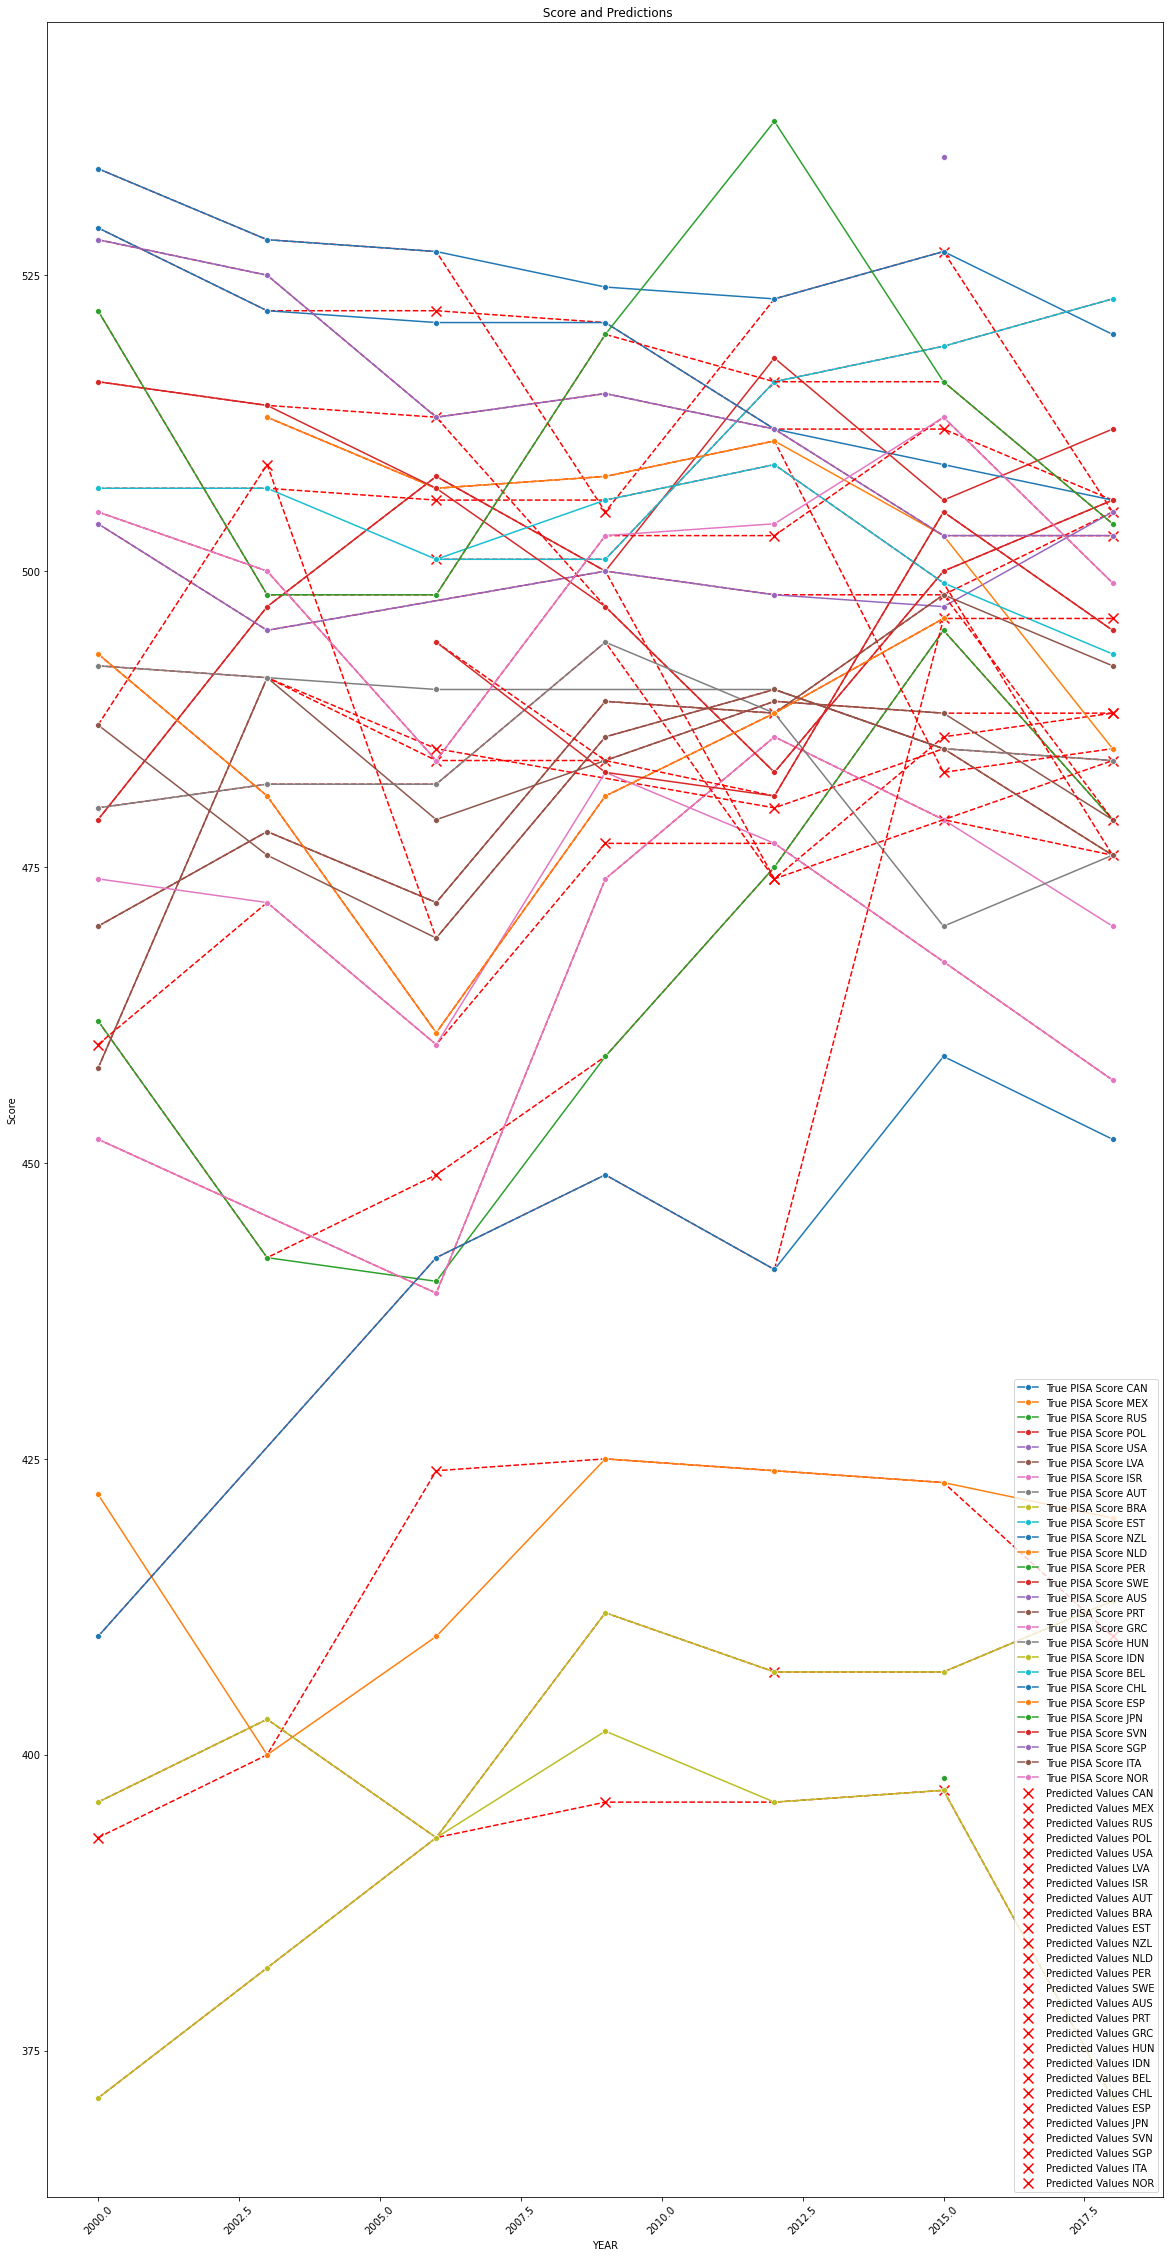

In [72]:
###all countries in one plot - maybe an annual systematic error might be spottet on country basis###
plt.figure(figsize=(20,40))
for country in  estimated_countries:

    tmp = estimated_countries_data.loc[estimated_countries_data["COUNTRY"]== country].copy()

    s = sns.lineplot(data = tmp, x="YEAR", y="new_pisa", color='r', linestyle='--')
    p = sns.lineplot(data = tmp, x="YEAR", y="PISA-SCORE", marker='o', label=f"True PISA Score {country}")
    plt.scatter(tmp["YEAR"], tmp["y_predict"], color='r', marker='x', label=f"Predicted Values {country}", s=100)
    p.get_xaxis().get_major_formatter().set_useOffset(False)

plt.xticks(rotation=45)
plt.title(f" Score and Predictions")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()
plt.close()

In den jeweiligen Skripten exportieren wir alle Plots und Tabellen. Eine Modellauf besteht zudem aus dem trainieren und testen verschiedener Modelle.
Zudem haben wir am Ende jedes Laufs eine Tabelle mit den wichtigsten Daten des Laufs aus der "Results" Tabelle erstellt.
In den jeweiligen Läufen haben wir auch zum Teil zusätzliche/andere Parameter mit ausgegeben (z.B. alphas und iMpurity beim Pruning, Hyperparameter, ...)

Wir haben die folgenden Modelläufe für alle Pisa Typen initiiert:
1. Ein Modell ohne jewglich Einschränkungen je non-NA Anteil und Input Daten Typ (Single_Tree_No_Restrictions_All_Input.py)
2. Ausprobieren verschiedener Hyperparameter um die Effekte zu Beobachten und zu verstehen (nur einmalig mit einem Pisa) (Single_tree_Hyperparameter_Experimentation.py)
3. Optimierung der Hyperparameter je non-NA Anteil und Input Daten Typ (Single_Tree_Optimisation.py)
4. Pruning ohne Einschränkungen auf allen Input-Daten (Pruning_no_Restrictions.py)

Mit ausgewählten Input-Daten haben wir folgende Modelläufe für die Analyse der Pisa Daten gestartet:
5. Pruning mit allen effizienten Alphas auf den optimalen Bäumen je non-NA Anteil und Input Daten Typ (Pruning_on_optimal_Tree.py)
6. Optimiertes Pruning auf ausgewählten Input Daten (Pruning_Optimisation.py)
7. Random Forest mit einem Beispieldatensatz zum Ausprobieren der verschiedenen Hyperparameter (Random_Forest_Parameter_Experimentation.py)
8. Random Forest ohne jegliche einschränkungen auf ausgewählten Input Daten (Random_Forest_no_restrictions.py)
9. Random Forest mit den Hyperparametern der optimierten Bäume (Random_Forest_on_optimal_Tree.py)
10. Random Forest mit Hyperparametern der optimierten Bäume und ausgewähltem Alpha für das Pruning (Random_Forest_pruned_Tree.py)

Beim Pruning wurde zudem ein vergleich über verschiedene Alphas ergänzt:

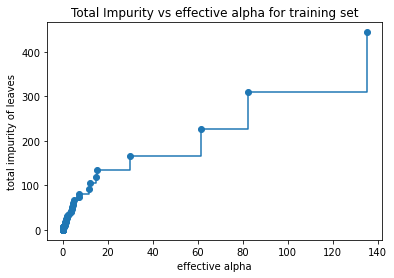

In [10]:
# prepare Data
feature_columns = [x for x in data_for_model.columns if x != "PISA-SCORE" and x != "COUNTRY"]
X = data_for_model[feature_columns]
y = data_for_model["PISA-SCORE"]

# Split Data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.15,
                                                                            random_state=42)

# create and train model
model_tree = DecisionTreeRegressor()
path = model_tree.cost_complexity_pruning_path(X_train_final, y_train_final)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
alphas_impurities = dict(zip(ccp_alphas, impurities))

# Plot Impurity vs. effective alphas
plt.figure()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()
plt.close()

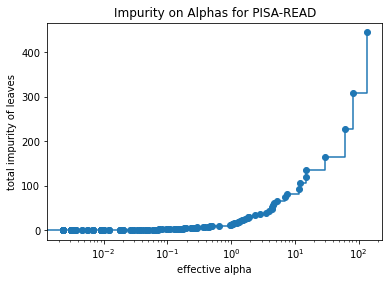

In [11]:
# to ease visibility in für the low alphas: logarithmic scale
# Plot Imupority vs. effective alphas
plt.figure()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.xscale("log")
plt.title(f"Impurity on Alphas for PISA-{pisa_type}")
plt.show()
plt.close()

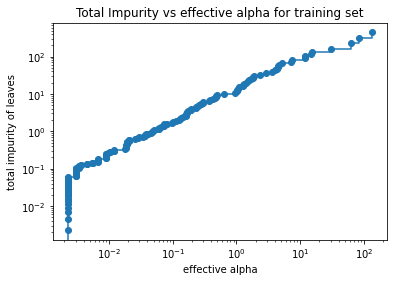

In [12]:
# looks very exponential - add logarithmic scale for y-axis
plt.figure()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.xscale("log")
plt.yscale("log")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()
plt.close()

<timed exec>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Wall time: 19min 1s


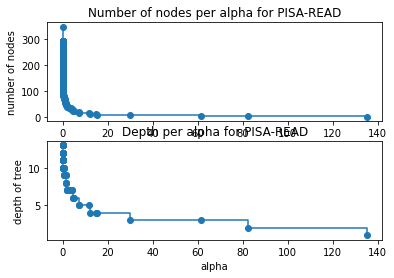

In [13]:
%%time
regressors = []
for ccp_alpha in ccp_alphas:
    model_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    model_tree.fit(X_train_final, y_train_final)
    regressors.append(model_tree)

# when all alphas run through - Plots for different alphas
# plot showing different depths
regressors = regressors[:-1]
ccp_alphas_no_root = ccp_alphas[:-1]

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_no_root, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title(f"Number of nodes per alpha for PISA-{pisa_type}")
ax[1].plot(ccp_alphas_no_root, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title(f"Depth per alpha for PISA-{pisa_type}")
fig.show()

In [ ]:
# plot showing scores per alpha
train_scores = [regressor.score(X_train_final, y_train_final) for regressor in regressors]
test_scores = [regressor.score(X_test_final, y_test_final) for regressor in regressors]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R2")
ax.set_title(f"R2 per alpha for training and testing sets for PISA-{pisa_type}")
ax.plot(ccp_alphas_no_root, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas_no_root, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
fig.show()

Beim Random Forest sind wir wie folgt vorgegegangen (ausgegebene Plots bis auf die Robustness (s.u.) gleich):

In [23]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# prepare Data
feature_columns = [x for x in data_for_model.columns if x != "PISA-SCORE" and x != "COUNTRY"]
X = data_for_model[feature_columns]
y = data_for_model["PISA-SCORE"]

# Split Data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.15)

# create model
model_forest = RandomForestRegressor()

# train model
model_forest.fit(X_train_final, y_train_final)

# get child estimators
child_estimators = model_forest.estimators_

# evaluate model
y_predict = model_forest.predict(X_test_final)

Wall time: 19min 16s


Zur Analyse der verwendeten Features ziehen wir neben der Feature Importance des Regressors auch die Permutational Importance zu Rate.
Diese berechnen wir einmal für die Test und einmal für die Trainingsdaten, da sich hier Diskrepanzen ergeben können.

In [24]:
%%time
# get feature permutation imortance on test-data
perm_import_test = permutation_importance(model_forest, X_test_final, y_test_final)

Wall time: 17min 48s


In [25]:
%%time
# get feature permutation imortance on training-data
perm_import_train = permutation_importance(model_forest, X_train_final, y_train_final)

Wall time: 15min 5s


In [27]:
# save information about features
features = X.columns.to_list()
features_df = pd.DataFrame(index=features)
features_df["Feature Importance"] = model_forest.feature_importances_
features_df["TEST-Permutation Importance Mean"] = perm_import_test.importances_mean
features_df["TEST-Permutation Importance SD"] = perm_import_test.importances_std
features_df["TRAIN-Permutation Importance Mean"] = perm_import_train.importances_mean
features_df["TRAIN-Permutation Importance SD"] = perm_import_train.importances_std
features_df = features_df.sort_values("TEST-Permutation Importance Mean", ascending=False)
features_merged = features_df.merge(column_information, how="left", left_index=True, right_index=True)
features_merged

,Feature Importance,TEST-Permutation Importance Mean,TEST-Permutation Importance SD,TRAIN-Permutation Importance Mean,TRAIN-Permutation Importance SD,NA-Values,NA-Values [%],Inpolated,Inpolated [%],Annual Mean,Annual Mean [%]
"TM.TAX.MANF.BR.ZS-Bound rate, simple mean, manufactured products (%)",0.365472,0.469140,0.139361,0.383066,0.017223,8.0,3.463203,7.0,3.030303,1.0,0.432900
SI.DST.FRST.20-Income share held by lowest 20%,0.048131,0.045579,0.027721,0.057845,0.007095,80.0,34.632035,51.0,22.077922,29.0,12.554113
SP.POP.SCIE.RD.P6-Researchers in R&D (per million people),0.084778,0.030000,0.017943,0.022354,0.001663,38.0,16.450216,30.0,12.987013,8.0,3.463203
"SP.ADO.TFRT-Adolescent fertility rate (births per 1,000 women ages 15-19)",0.028753,0.010508,0.005052,0.003989,0.000363,1.0,0.432900,0.0,0.000000,1.0,0.432900
AG.LND.ARBL.HA.PC-Arable land (hectares per person),0.005550,0.007817,0.001523,0.002500,0.000733,43.0,18.614719,39.0,16.883117,4.0,1.731602
...,...,...,...,...,...,...,...,...,...,...,...
"IOTSI4_2018 - : Domestic output and imports + Mining support service activities + Agriculture, forestry and fishing [Millions US Dollar]",0.000485,-0.000437,0.000364,0.000267,0.000042,76.0,32.900433,72.0,31.168831,4.0,1.731602
ETCR - Market structure : [],0.000999,-0.000488,0.000177,0.000329,0.000057,100.0,43.290043,73.0,31.601732,27.0,11.688312
"GREEN_GROWTH - : Population, ages 65 and above, % total [Units Percentage]",0.006094,-0.000532,0.000765,0.000448,0.000064,3.0,1.298701,0.0,0.000000,3.0,1.298701
"ANBERD_REV4 - PPP dollars - 2015 prices : Main activity + FOOD PRODUCTS, BEVERAGES AND TOBACCO + 2015.0 [Units US Dollar]",0.000297,-0.000546,0.000457,0.000085,0.000027,88.0,38.095238,50.0,21.645022,38.0,16.450216


In [28]:
# store information on child estimators
child_estimator_info = pd.DataFrame(index=child_estimators)
for estimator in child_estimators:
    params = estimator.get_params()
    child_estimator_info.loc[estimator, "Parameter"] = model_run
    child_estimator_info.loc[estimator, "Percentage non-NA"] = iteration
    child_estimator_info.loc[estimator, "R2"] = estimator.score(X_test_final, y_test_final)
    child_estimator_info.loc[estimator, "Random State"] = params["random_state"]
    child_estimator_info.loc[estimator, "Depth"] = estimator.get_depth()
    child_estimator_info.loc[estimator, "Number of Features"] = estimator.max_features_
    child_estimator_info.loc[estimator, "Percentage of Features"] = estimator.max_features
    child_estimator_info.loc[estimator, "Number Leaves"] = estimator.get_n_leaves()
    child_estimator_info.loc[estimator, "Feature Importance"] = str(
        estimator.feature_importances_)  # return to list with json lib -> json.loads()
    child_estimator_info.loc[estimator, "Predictions"] = str(
        estimator.predict(X_test_final))  # return to list with json lib -> json.loads()
child_estimator_info

,Parameter,Percentage non-NA,R2,Random State,Depth,Number of Features,Percentage of Features,Number Leaves,Feature Importance,Predictions
"DecisionTreeRegressor(max_features='auto', random_state=1608637542)",Random_Forest_no_restrictions_RS42_2,65.0,0.565092,1.608638e+09,12.0,19652.0,auto,104.0,[0. 0. 0. ... 0. 0. 0.],[445. 487. 511. 498. 526. 544. 527. 488. 477. ...
"DecisionTreeRegressor(max_features='auto', random_state=1273642419)",Random_Forest_no_restrictions_RS42_2,65.0,0.902750,1.273642e+09,10.0,19652.0,auto,100.0,[0. 0. 0. ... 0. 0. 0.],[424. 486. 506. 498. 515. 542. 532. 476. 491. ...
"DecisionTreeRegressor(max_features='auto', random_state=1935803228)",Random_Forest_no_restrictions_RS42_2,65.0,0.751211,1.935803e+09,12.0,19652.0,auto,101.0,[0. 0. 0. ... 0. 0. 0.],[424. 548. 502. 519. 511. 504. 487. 476. 509. ...
"DecisionTreeRegressor(max_features='auto', random_state=787846414)",Random_Forest_no_restrictions_RS42_2,65.0,0.833685,7.878464e+08,10.0,19652.0,auto,108.0,[0. 0. 0. ... 0. 0. 0.],[445. 484. 507. 495. 511. 527. 527. 482. 492. ...
"DecisionTreeRegressor(max_features='auto', random_state=996406378)",Random_Forest_no_restrictions_RS42_2,65.0,0.821938,9.964064e+08,12.0,19652.0,auto,97.0,[0. 0. 0. ... 0. 0. 0.],[389. 492. 499. 489. 501. 483. 518. 468. 486. ...
...,...,...,...,...,...,...,...,...,...,...
"DecisionTreeRegressor(max_features='auto', random_state=893102645)",Random_Forest_no_restrictions_RS42_2,65.0,0.788737,8.931026e+08,12.0,19652.0,auto,102.0,[0. 0. 0. ... 0. 0. 0.],[389. 491. 548. 548. 493. 524. 527. 468. 488. ...
"DecisionTreeRegressor(max_features='auto', random_state=200619113)",Random_Forest_no_restrictions_RS42_2,65.0,0.807649,2.006191e+08,12.0,19652.0,auto,105.0,[0. 0. 0. ... 0. 0. 0.],[419. 485. 513. 495. 519. 515. 512. 482. 496. ...
"DecisionTreeRegressor(max_features='auto', random_state=290770691)",Random_Forest_no_restrictions_RS42_2,65.0,0.904588,2.907707e+08,12.0,19652.0,auto,94.0,[0. 0. 0. ... 0.000207...,[417. 487. 506. 501. 504. 544. 527. 482. 491. ...
"DecisionTreeRegressor(max_features='auto', random_state=793943861)",Random_Forest_no_restrictions_RS42_2,65.0,0.780207,7.939439e+08,11.0,19652.0,auto,100.0,[0. 0. 0. ... 0. 0. 0.],[448. 516. 513. 495. 510. 515. 527. 482. 498. ...


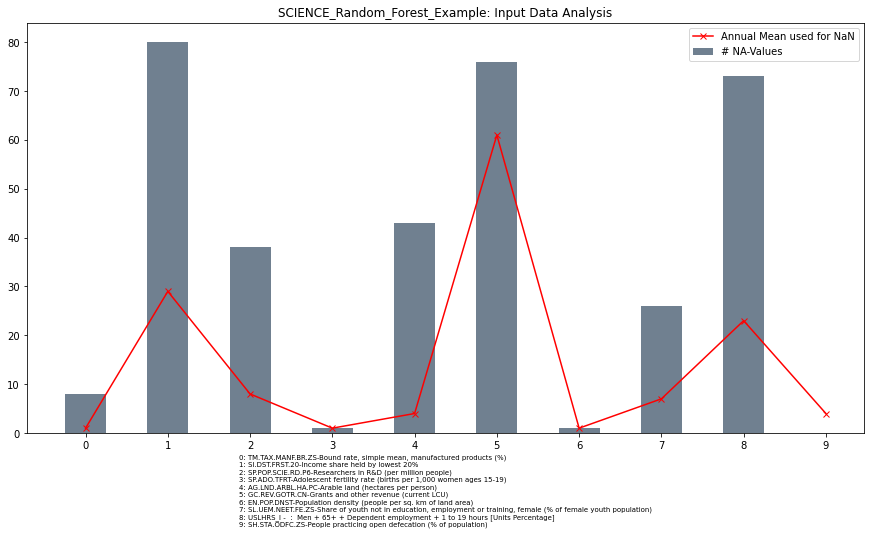

In [33]:
### Robustness-Check ###
plt.figure(figsize=(15, 15))
feature_names = features_merged.index.to_list()[:10]
feature_names = [f"{x}: {feature_names[x]}" for x in range(len(feature_names))]
feature_names = "\n".join(feature_names)
data = features_merged[:10].copy()

plt.plot(range(len(data.index)), data["Annual Mean"], marker="x", c="r", label="Annual Mean used for NaN")
plt.hist(data.index, bins=range(len(data.index)), color="slategray", align="left", rwidth=0.5,
         weights=data["NA-Values"], label="# NA-Values")
plt.legend()
plt.xticks(range(len(data.index)), range(len(data.index)));
plt.xlabel(feature_names, fontsize="x-small", ma="left")
plt.title(f"{pisa_type}_{model_run}: Input Data Analysis")
plt.gcf().subplots_adjust(bottom=0.5)
plt.show()
plt.close()

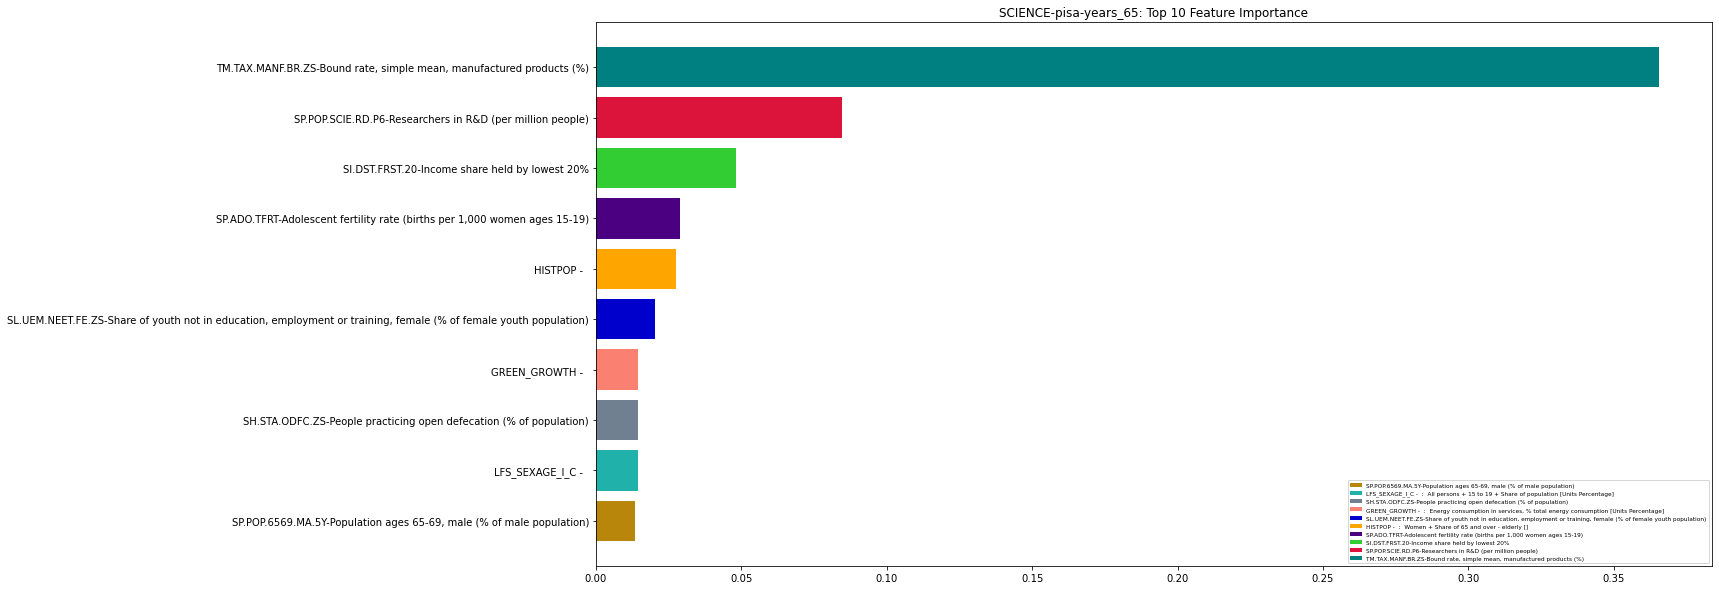

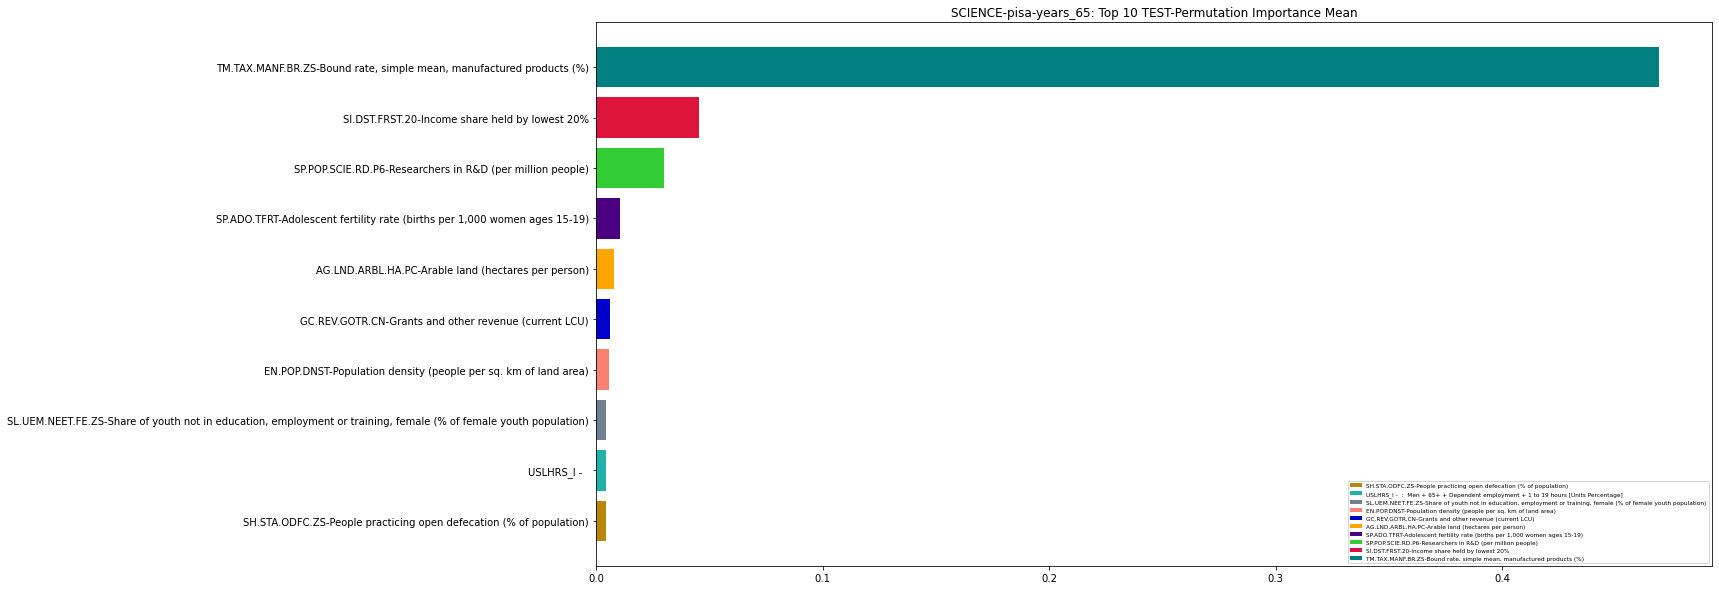

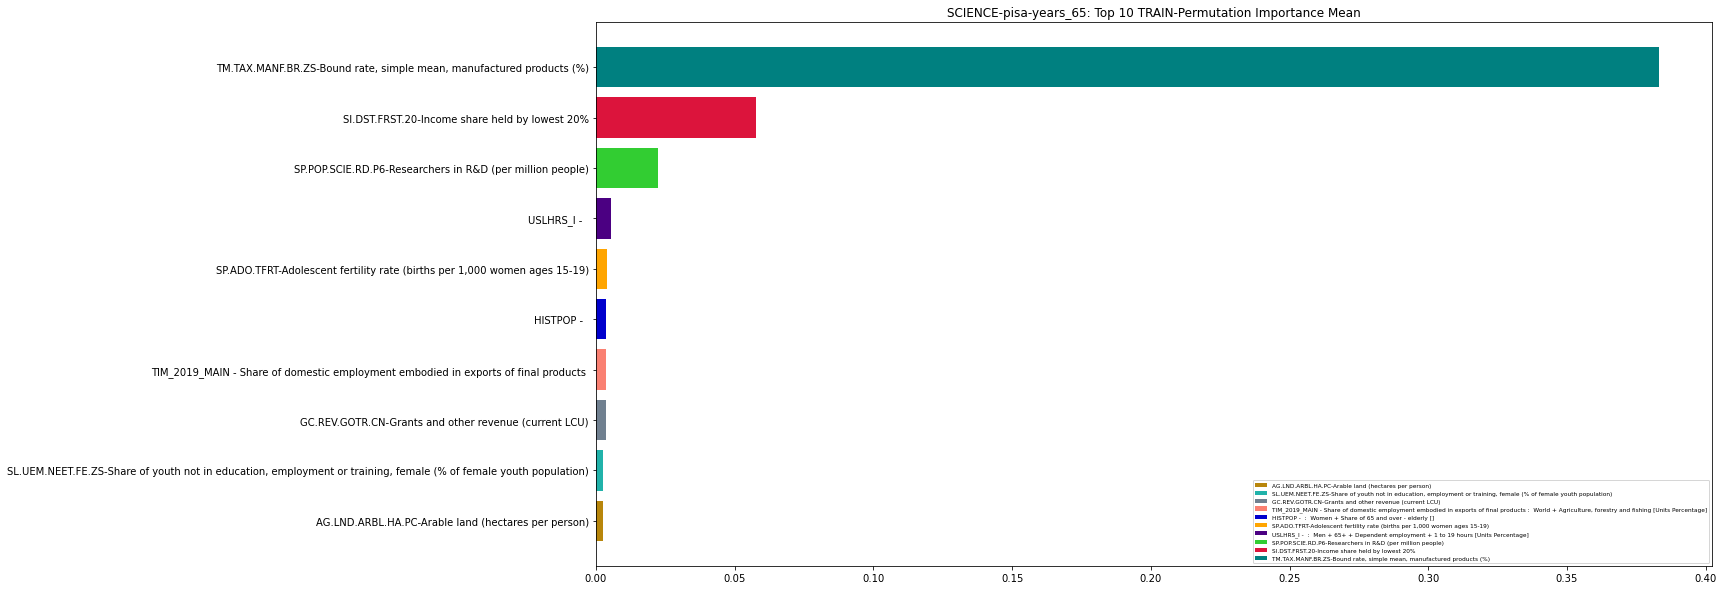

<ipython-input-40-271649afdc78>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [40]:
# compare the different measures of feature importance
###Feature Analysis###
Importance_Measures = ["Feature Importance", "TEST-Permutation Importance Mean",
                       "TRAIN-Permutation Importance Mean"]
imp_df = features_df.copy()
all_measures = []
colors = ["teal", "crimson", "limegreen", "indigo", "orange", "mediumblue", "salmon",
          "slategray", "lightseagreen", "darkgoldenrod"]
for importance_measure in Importance_Measures:
    features_df = features_df.sort_values(importance_measure, ascending=False)
    data = features_df[:10].copy()
    data["name"] = [x.split(":")[0] for x in data.index]
    data["labels"] = [str(x) for x in range(len(data))]
    data["color"] = colors[:len(data)]
    data = data.sort_values(importance_measure)

    all_measures.extend(data.index.to_list())

    fig = plt.figure(figsize=(20, 10))
    for f in data.index:
        plt.barh(data.loc[f, "labels"], data.loc[f, importance_measure], align="center",
                 tick_label=data.loc[f, "name"], color=data.loc[f, "color"])

    plt.title(f"{pisa_type}-{input_data}_{iteration}: Top 10 {importance_measure}")
    plt.legend(labels=data.index, ncol=1, bbox_transform=fig.transFigure, loc="lower right",
               fontsize='xx-small')
    plt.yticks(ticks=np.arange(len(data)), labels=data["name"])
    plt.show()
    plt.close()

all_measures = set(all_measures)
plot_df = features_df.loc[all_measures, :].copy()
names = [f"{x}: {plot_df.index.to_list()[x]}" for x in range(len(plot_df.index))]
names_overview = "\n".join(names)

fig = plt.figure(figsize=(10, 10))
plt.title(f"{pisa_type}-{model_run}: Measures of Feature Importance")
plt.scatter(x=range(len(names)), y=plot_df["Feature Importance"], label="Feature Importance")
plt.scatter(x=range(len(names)), y=plot_df["TEST-Permutation Importance Mean"], label="TEST Permutation Importance")
plt.scatter(x=range(len(names)), y=plot_df["TRAIN-Permutation Importance Mean"],
            label="TRAIN Permutation Importance")
plt.xticks(ticks=range(len(names)), fontsize="small")
plt.xlabel(names_overview, fontsize="x-small", ma="left")
plt.legend(loc="upper left", fontsize="small")
plt.gcf().subplots_adjust(bottom=0.3)
fig.show()
plt.close()

Da wir nach den Modelläufen viele Ergebnisse direkt in Excel sehen oder die Diagramme betrachten können, lässt sich vieles aus den Outputs der Skripte bereits ablesen.
Auf die, unser Meinung nach, wichtigsten Punkte möchten wir allerdings auch hier eingehen und diese hier nochmal veranschaulichen.

Nachdem wir die ersten paar Modelldurchläufe verglichen und analysiert haben, haben wir etwas unerwartetes festgestellt:
Die Scores vom auf Hyperparameter optimierten Baum und die vom geprunten Baum mit den selber Hyperparametern und alpha = 0 waren nicht gleich, obwohl die selben Testdaten verwendet wurden.
Dies war bei allen Pisas und allen Inputdaten der Fall. Beispiel Math, aggregated years

In [23]:
# Paths to Results and Tree-Information
path_results_opt_single_tree = Path(path_results / "aggregated-years_Optimal_Single_Tree")
path_results_pruning_on_opt_tree = Path(path_results / "aggregated-years_Pruning_on_opt_Tree")

# load overview Tables
overview_opt_single_tree = pd.read_csv(path_results_opt_single_tree / "MATH_Overview_aggregated-years_Optimal_Single_Tree.csv", index_col="Unnamed: 0")
overview_pruning = pd.read_csv(path_results_pruning_on_opt_tree / "MATH_Overview_aggregated-years_Pruning_on_Opt_Tree.csv", index_col=["Unnamed: 0"])

overview_pruning

,Percentage non-NA,Alpha,Total Features,Features Tree,RMSE,R2,max_Depth,Nodes_Tree,Impurities,Percentage_NA_mean,Mean_Approximated_Values[%]
"(70, 0.0)",70,0.000000,15417,15,12.829965,0.922118,5.0,31.0,0.000000,7.965368,10.678211
"(70, 0.0025510204081632647)",70,0.002551,15417,15,11.350053,0.939049,5.0,31.0,0.038265,7.474747,11.774892
"(70, 0.003401360543722724)",70,0.003401,15417,15,12.238574,0.929132,5.0,31.0,0.045068,6.955267,10.447330
"(70, 0.003401360544168191)",70,0.003401,15417,15,12.004568,0.931816,5.0,31.0,0.055272,8.571429,11.139971
"(70, 0.003401360544613657)",70,0.003401,15417,15,12.154599,0.930101,5.0,31.0,0.062075,7.994228,12.871573
...,...,...,...,...,...,...,...,...,...,...,...
"(100, 50.22479059806688)",100,50.224791,27,3,23.653085,0.735295,3.0,9.0,442.998795,0.000000,0.000000
"(100, 75.49534041258346)",100,75.495340,27,2,24.426439,0.717702,2.0,7.0,518.494136,0.000000,0.000000
"(100, 87.36870537689093)",100,87.368705,27,1,24.309530,0.720398,2.0,5.0,605.862841,0.000000,0.000000
"(100, 204.94139098898515)",100,204.941391,27,1,22.836915,0.753247,1.0,3.0,810.804232,0.000000,0.000000


In [24]:
overview_opt_single_tree.loc[70:]

,Percentage non-NA,Total Features,Features Tree,RMSE,R2,Percentage_NA_mean,max_Depth,min_leaf,min_split,Mean_Approximated_Values[%]
70,Aggregation_Optimal_Single_Tree,15417,15,12.268875,0.928781,0.541126,5.0,5.0,7.0,2.164502
75,Aggregation_Optimal_Single_Tree,12380,20,11.633440,0.935967,0.649351,5.0,2.0,7.0,0.649351
80,Aggregation_Optimal_Single_Tree,10547,22,14.038185,0.906759,0.649351,6.0,2.0,10.0,0.649351
85,Aggregation_Optimal_Single_Tree,6257,22,13.376286,0.915344,0.606061,5.0,2.0,6.0,2.337662
90,Aggregation_Optimal_Single_Tree,4545,46,13.744280,0.910622,0.511610,8.0,2.0,5.0,0.511610
95,Aggregation_Optimal_Single_Tree,2455,28,13.491277,0.913882,1.028139,9.0,2.0,11.0,1.136364
100,Aggregation_Optimal_Single_Tree,27,19,26.835800,0.659265,NaN,9.0,3.0,6.0,NaN


In [36]:
overview_pruning_alpha_zero = overview_pruning.loc[overview_pruning["Alpha"] == 0]
overview_pruning_alpha_zero

,Percentage non-NA,Alpha,Total Features,Features Tree,RMSE,R2,max_Depth,Nodes_Tree,Impurities,Percentage_NA_mean,Mean_Approximated_Values[%]
"(70, 0.0)",70,0.0,15417,15,12.829965,0.922118,5.0,31.0,0.0,7.965368,10.678211
"(75, 0.0)",75,0.0,12380,20,12.840692,0.921988,5.0,41.0,0.0,8.549784,12.229437
"(80, 0.0)",80,0.0,10547,22,12.552669,0.925448,6.0,45.0,0.0,5.706415,8.579299
"(85, 0.0)",85,0.0,6257,22,13.082955,0.919016,5.0,45.0,0.0,5.234160,6.926407
"(90, 0.0)",90,0.0,4545,46,11.888690,0.933126,8.0,97.0,0.0,3.736119,5.138340
"(95, 0.0)",95,0.0,2455,28,14.942279,0.894362,9.0,57.0,0.0,1.870748,2.102659
"(100, 0.0)",100,0.0,27,22,25.190984,0.699754,9.0,87.0,0.0,0.000000,0.000000


Obwohl die gleichen Parameter verwendet wurden und der Baum sich nach Algorithmus so baut, dass er immer das Feature auswählt, das den MSE am meisten reduziert,
bauen sich verschiedene Bäume. Ein Blick in die Informationen in einen der Bäume zeigt:

In [152]:
path_tree_opt_single_tree = Path(path_tree / "aggregated-years_Optimal_Single_Tree")
path_tree_pruning_on_opt_tree = Path(path_tree / "aggregated-years_Pruning_on_opt_Tree")

# load overview Tables
features_opt_single_tree = pd.read_csv(path_results_opt_single_tree / "MATH-75_Feature_Analysis_aggregated-years_Optimal_Single_Tree.csv", index_col="Feature")
features_pruning = pd.read_csv(path_results_pruning_on_opt_tree / "MATH-75_Feature_Analysis_Alpha_0.0_aggregated-years_Pruning_on_Opt_Tree.csv", index_col="Feature")
tree_opt_single_tree = pd.read_csv(path_tree_opt_single_tree / "MATH-75_aggregated-years_Optimal_Single_Tree.csv")
tree_pruning = pd.read_csv(path_tree_pruning_on_opt_tree / "MATH-75_Alpha_0.0_aggregated-years_Pruning_on_Opt_Tree.csv")

In [131]:
features_opt_not_prun = [x for x in features_opt_single_tree.index if not(x in features_pruning.index)]
features_pruning_not_opt = [x for x in features_pruning.index if not(x in features_opt_single_tree.index)]

In [153]:
tree_opt_single_tree_different = tree_opt_single_tree.loc[tree_opt_single_tree["Node"].isin(features_opt_not_prun)]
tree_opt_single_tree_different

,Node,Threshold,Samples,Value
1,AWCOMP - Increase in net income after an incre...,0.872253,27,403.592593
2,AEI_OTHER - Energy industries : [Thousands T...,181709.820300,13,381.923077
3,RS_GBL - Tax revenue as % of total taxation : ...,9.905416,11,386.272727
7,PTRUB - : Couple with 2 children - partner's...,63.333334,14,423.714286
8,"HEALTH_STAT - Years lost, /100 000 females, ag...",69.391666,11,416.818182
9,"SNA_TABLE1 - Current prices, constant exchange...",11247.357420,7,421.000000
15,NRR - : Couple with 2 children - partner's e...,45.583334,69,485.710145
16,PTRUB - : Single person with 2 children + 24...,16.005000,11,456.000000
20,NRR - : Couple with 2 children - partner's e...,67.750000,11,513.454545
28,"ERTR - : Tax revenue, % of total environment...",79.530495,9,530.222222


In [154]:
tree_pruning_different = tree_pruning.loc[tree_pruning["Node"].isin(features_pruning_not_opt)]
tree_pruning_different

,Node,Threshold,Samples,Value
1,FTPTC_I - : Women + 55 to 59 + Dependent emp...,6.945693e+01,27,403.592593
2,TEMP_I - : Men + 55 to 64 + Dependent employ...,1.828583e+01,14,423.714286
4,"SP.POP.TOTL.FE.ZS-Population, female (% of tot...",4.708482e+09,11,416.818182
6,"TM.VAL.OTHR.ZS.WT-Computer, communications and...",2.904395e+09,7,421.000000
9,HEALTH_PROC - Days : Single spontaneous deliv...,3.233290e+00,13,381.923077
10,GREEN_GROWTH - : Welfare costs of premature ...,1.002912e-01,11,386.272727
15,NRR - : Couple with 2 children - partner's e...,6.083333e+01,69,485.710145
16,METR - : Single person with 2 children + Fro...,4.266667e+01,11,456.000000
20,SHA - Share of financing scheme : Voluntary s...,4.642083e+00,11,513.454545
28,"SHA - Per capita, current prices, current PPPs...",7.439866e+01,9,530.222222


In [150]:
# Take a look at the splits
splits = tree_opt_single_tree_different.merge(tree_pruning_different, how="left", left_on="Value", right_on="Value")
splits = splits.drop(["Threshold_x", "Threshold_y"], axis=1)
splits = splits.set_index("Value")
splits

,Node_x,Samples_x,Node_y,Samples_y
Value,,,,
403.592593,AWCOMP - Increase in net income after an incre...,27,FTPTC_I - : Women + 55 to 59 + Dependent emp...,27
381.923077,AEI_OTHER - Energy industries : [Thousands T...,13,HEALTH_PROC - Days : Single spontaneous deliv...,13
386.272727,RS_GBL - Tax revenue as % of total taxation : ...,11,GREEN_GROWTH - : Welfare costs of premature ...,11
423.714286,PTRUB - : Couple with 2 children - partner's...,14,TEMP_I - : Men + 55 to 64 + Dependent employ...,14
416.818182,"HEALTH_STAT - Years lost, /100 000 females, ag...",11,"SP.POP.TOTL.FE.ZS-Population, female (% of tot...",11
421.000000,"SNA_TABLE1 - Current prices, constant exchange...",7,"TM.VAL.OTHR.ZS.WT-Computer, communications and...",7
485.710145,NRR - : Couple with 2 children - partner's e...,69,NRR - : Couple with 2 children - partner's e...,69
456.000000,PTRUB - : Single person with 2 children + 24...,11,METR - : Single person with 2 children + Fro...,11
513.454545,NRR - : Couple with 2 children - partner's e...,11,SHA - Share of financing scheme : Voluntary s...,11


Bei einem Blick in den Baum sieht man, dass die Features and den gleichen stellen sind, den MSE gleich viel verbessern.
Anhand der oben dargestellten Tabelle sieht man, dass die Features den exakt gleichen Split machen.
Das Problem ist, dass wir zu wenig Daten und zu viele Features haben und es deshalb mehrere Möglichkeiten für den Best-Split beim Trainieren gibt.
Der Baum nimmt einen zufällig, der auf den Test-Daten aber unterschiedlich gut funktionieren (Test/Train-Split ist immer gleich).


Für uns bedeutet das leider, dass unsere bisherigen Modelle keinerlei Vergleichbarkeit haben.
Das Setzen eines Random States im Regressor löst das Problem der Vergleichbarkeit (bei der Möglichkeit gleicher Splits wird immer der selbe Feature verwendet), allerdings ist es vollkommen willkürlich welches der Features ausgewählt wird.
Wir möchten darauf hinweisen, dass dieses Vorgehen das Problem kaschiert und die durch die Bäume erreichten Scores beinahe vollkommen wilkürlich sind.

Allgemein gilt es anzumerken, dass durch diese extrem kleinen Menge an Daten, die wir vorhersagen wollen, "zufällige" Korrelationen sehr wahrscheinlich sind.
Bei einer größeren Menge an Datenpunkten des Targets sind solche zufälligen "Korrelationen" deutlich unwahrscheinlicher.
Unsere große Menge an Features unterstützt dieses Phänomen natürlich.

Um zumindest die Modelläufe miteinander zu vergleichen, wenden wir nun dennoch einen Random State im Regressor an und führen die Modelläufe nocheinmal aus.
Die zuvor vorgestellten Skripte werden lediglich um das setzten eines Random States angebasst und nochmal auf dem Server ausgeführt.

Wie schon zuvor sticht auch hier in Auge, dass die optimierten Modelle bei einem non-NA Anteil von 100% vergleichbar gute R² und geringe RMSE erzielt werden.
Aus diesem Grund möchten wir ein Augenmerk auf die zur Verfügung stehenden Features legen.
Hierfür zeigen wir hier die Features für MATH, 100% aggregated-years:

In [156]:
path_results_opt_single_tree = Path(path_results / "aggregated-years_Optimal_Single_Tree")
results_overview = pd.read_csv(path_results_opt_single_tree / "MATH-100_Results_aggregated-years_Optimal_Single_Tree_RS42_2.csv", index_col="Unnamed: 0")
results_overview

,Modelrun,COUNTRY,PISA-SCORE,y_predict,Absoloute Error,Squared Error,RMSE,R^2,YEAR,RandomSearch,GridSearch,Percentage Test-Data,Optimal_Depth,Optimal_min_leafs,Optimal_min_splits,R2 Training Data
aggregated-years_Optimal_Single_Tree_RS42_2,aggregated-years_Optimal_Single_Tree_RS42_2,NaN,NaN,NaN,14.776417,416.843444,20.416744,0.802776,NaN,False,True,15.0,6.0,4.0,9.0,0.890063
TUR-2003,aggregated-years_Optimal_Single_Tree_RS42_2,TUR,423.0,434.250000,11.250000,126.562500,11.250000,NaN,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESP-2018,aggregated-years_Optimal_Single_Tree_RS42_2,ESP,481.0,498.934783,17.934783,321.656427,17.934783,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT-2015,aggregated-years_Optimal_Single_Tree_RS42_2,AUT,497.0,498.934783,1.934783,3.743384,1.934783,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOR-2006,aggregated-years_Optimal_Single_Tree_RS42_2,NOR,490.0,498.000000,8.000000,64.000000,8.000000,NaN,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEL-2015,aggregated-years_Optimal_Single_Tree_RS42_2,BEL,507.0,510.666667,3.666667,13.444444,3.666667,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGP-2015,aggregated-years_Optimal_Single_Tree_RS42_2,SGP,564.0,513.333333,50.666667,2567.111111,50.666667,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAN-2009,aggregated-years_Optimal_Single_Tree_RS42_2,CAN,527.0,521.571429,5.428571,29.469388,5.428571,NaN,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RUS-2009,aggregated-years_Optimal_Single_Tree_RS42_2,RUS,468.0,480.625000,12.625000,159.390625,12.625000,NaN,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LVA-2015,aggregated-years_Optimal_Single_Tree_RS42_2,LVA,482.0,480.125000,1.875000,3.515625,1.875000,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
features = pd.read_csv(path_results_opt_single_tree / "MATH-100_Feature_Analysis_aggregated-years_Optimal_Single_Tree_RS42_2.csv")
features

,Feature,Samples,NA-Values,NA-Values [%],Inpolated,Inpolated [%],Annual Mean,Annual Mean [%],Robustness - Samples affected by NA [Samples],Robustness - Samples affected by Annual Mean [Samples]
0,LAND_USE - : Total area [Units Square kilome...,348.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PAT_DEV - : Two and greater + All technologi...,193.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LAND_USE - : Land area [Units Square kilomet...,178.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PAT_DEV - : One and greater (all inventions)...,167.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,YEAR,89.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
5,PAT_DEV - : Four and greater + All technolog...,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,PAT_DEV - : Three and greater + All technolo...,26.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wir sehen, dass das Feature das am häufigsten im Baum vorkommt "Land_USE: Total Area" ist, es geht also um die Fläche des Landes.
Ein Blick in die Rohdaten des Features:

In [177]:
input_feature = pd.read_csv(Path(path_input / "aggregated-years") / "MATH-100.csv", index_col="Index")
relevant_feature = features.iloc[0,0]
input_feature = input_feature.loc[:, ["COUNTRY", "PISA-SCORE", relevant_feature]]
input_feature

,COUNTRY,PISA-SCORE,LAND_USE - : Total area [Units Square kilometres]
Index,,,
AUS-2003,AUS,524.0,7741220.0
AUS-2006,AUS,520.0,7741220.0
AUS-2009,AUS,514.0,7741220.0
AUS-2012,AUS,504.0,7741220.0
AUS-2015,AUS,494.0,7741220.0
...,...,...,...
USA-2006,USA,474.0,9632030.0
USA-2009,USA,487.0,9831510.0
USA-2012,USA,481.0,9831510.0


Wir stellen die Hypothese auf, dass das Feature als "Proxy" für das Land einsteht.
Nun stellt sich die Frage, ob die Pisa-Daten innerhalb eines Landes stark streuen

In [211]:
from Global_configuartions import FOLDERNAME_PISA
import statistics

Pisa_Type = ["MATH", "READ", "SCIENCE"]
path_pisa = Path(FOLDERNAME_PISA)
country_csv = Path(FOLDERNAME_PISA) / "PISA_Länder.csv"
with open(country_csv, "r", encoding="utf-8-sig") as file:
    pisa_countries = file.read().splitlines()
country_overview_spread = pd.DataFrame(index=Pisa_Type, columns=pisa_countries)
country_overview_mean = pd.DataFrame(index=Pisa_Type, columns=pisa_countries)
for pisa_type in Pisa_Type:
    pisa_data = pd.read_csv(path_pisa/f"20-11-05_PISA_{str.lower(pisa_type)}_total.csv", index_col="Index")
    countries = [x for x in pisa_countries if x in pisa_data["COUNTRY"].to_list()]
    for country in countries:
        country_data = pisa_data.loc[pisa_data["COUNTRY"]==country, "value"].to_list()
        if len(country_data) >= 2:
            country_overview_spread.loc[pisa_type, country] = statistics.stdev(country_data)
            country_overview_mean.loc[pisa_type, country] = statistics.mean(country_data)

for pisa_type in Pisa_Type:
    country_overview_spread_values = country_overview_spread.loc[pisa_type].dropna().to_list()
    country_overview_mean_values = country_overview_mean.loc[pisa_type].dropna().to_list()
    country_overview_spread.loc[pisa_type, "Overall_Mean"] = statistics.mean(country_overview_spread_values)
    country_overview_mean.loc[pisa_type, "Overall_Mean"] = statistics.mean(country_overview_mean_values)

In [214]:
country_overview_spread["Overall_Mean"]

MATH       8.392364
READ       9.770410
SCIENCE    7.871238
Name: Overall_Mean, dtype: float64

In [213]:
country_overview_mean["Overall_Mean"]

MATH       484.668376
READ       484.673504
SCIENCE    489.160256
Name: Overall_Mean, dtype: float64

Man sieht, dass die durschnittliche Streuung des Pisa-Scores innhalb der einzelnen Länder mit ca. 2% des mittleren Pisa-Scores sehr gering ist.
Somit kann man sagen, dass das Land ein guter Schätzer für den Pisa-Score zu sein scheint. 

Für das betrachtete Feature (hier verwenden wir den Variationkoeffizienten als Parameter, da die Werte des Features der Länder stark auseinander gehen und ein Durschschnitt trügerisch sein kann)

In [216]:
countries_math = input_feature["COUNTRY"].unique()
feature_country_spread = pd.Series(index=countries_math)

for country in countries:
    country_data = input_feature.loc[input_feature["COUNTRY"]==country, relevant_feature].to_list()
    if len(country_data) >= 2:
        feature_country_spread[country] = statistics.stdev(country_data)/statistics.mean(country_data)

feature_country_spread = feature_country_spread.dropna()
feature_country_spread

<ipython-input-216-8e4bc392b6b0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_country_spread = pd.Series(index=countries_math)


AUS    0.000000e+00
AUT    0.000000e+00
BEL    0.000000e+00
BRA    0.000000e+00
CAN    0.000000e+00
CHE    4.877561e-06
CHL    3.571952e-04
COL    6.193187e-07
CZE    0.000000e+00
DEU    5.911524e-04
DNK    2.165163e-03
ESP    6.182408e-04
EST    1.330774e-03
FIN    3.461570e-04
FRA    2.230308e-04
GBR    0.000000e+00
GRC    0.000000e+00
HUN    0.000000e+00
IDN    1.279506e-03
IRL    0.000000e+00
ISL    0.000000e+00
ISR    0.000000e+00
ITA    9.885876e-04
JPN    7.844801e-05
KOR    3.221271e-03
LUX    0.000000e+00
LVA    5.349248e-04
MEX    1.039128e-06
NLD    9.828230e-05
NOR    2.664491e-01
NZL    0.000000e+00
POL    1.651504e-05
PRT    6.446614e-04
RUS    3.203385e-07
SVK    8.811460e-05
SVN    8.924092e-03
SWE    3.506176e-03
TUR    0.000000e+00
USA    1.054899e-02
dtype: float64

In [217]:
overall_average_spread = statistics.mean(feature_country_spread.to_list())
overall_average_spread

0.007744030743096407

Man sieht, dass die Streuung innerhalb der Länder, wie angenommen, praktisch nicht existent ist.
Nun stellt sich die Frage, wie gut das Feature allgemein mit dem Pisa Score korreliert.

In [218]:
# calculate correlation coefficient
input_feature["PISA-SCORE"].corr(input_feature[relevant_feature])

-0.18019516934420815

Da dieses Feature primär für die Güte des Modells verantwortlich ist, es nicht mit dem Pisa-Score korreliert, sondern lediglich eben wie die Pisa-Daten selbst marginale Schwankungen innerhalb der Länder aufweist, treffen wir nun die fundierte Annahme, dass das Feature räprentativ für das Land auftritt. 
Im Umkehrschluss gehen wir allerdings nun auch davon aus, dass die Größen des Features selbst für unsere modellierung irrelevant sind. 

Nun stellt sich die Frage, ob dieses Phänomen auch bei anderen Features auftritt (wovon wir ausgehen).
Dementsprechend führen wir ebendiese Betrachtung für alle Features aus. Das entsprechende Skript heißt: "Feature_Analysis.py"
Die Ergebnisse laden wir hier rein:

In [5]:
feature_analysis = pd.read_csv(path_results / "Feature_Analysis_Country_Proxy.csv", index_col="Unnamed: 0")
feature_analysis

,Mean countrywise variationcoefficient,Mean countrywise st.dev,Mean countrywise average,R for READ,R for MATH,R for SCIENCE
TABLE_I7 - : Average wage in US dollars based on Purchasing Power Parities [Units US Dollar]_x,0.220703,7417.961334,3.543917e+04,0.279572,0.291858,0.238921
TABLE_I7 - : Average wage in national currency units [Units National currency]_x,0.217087,435815.811982,1.584751e+06,0.141544,0.140489,0.089898
TABLE_I7 - : Personal income tax & employee social security contributions (All-in rate) [Units Percentage]_x,0.103251,4.065800,4.545714e+01,0.140993,0.110989,0.096085
TABLE_I7 - : Personal income tax [Units Percentage]_x,0.140216,4.335610,3.996398e+01,0.162382,0.099802,0.087004
TABLE_I7 - : Threshold (expressed as a multiple of the average wage) [Units Ratio]_x,0.467718,2.032746,4.008811e+00,-0.254846,-0.268354,-0.241512
...,...,...,...,...,...,...
"SL.EMP.VULN.ZS-Vulnerable employment, total (% of total employment) (modeled ILO estimate)",0.068423,0.675133,1.919488e+01,-0.689025,-0.728907,-0.721115
"SL.EMP.WORK.FE.ZS-Wage and salaried workers, female (% of female employment) (modeled ILO estimate)",0.009467,0.778385,8.062995e+01,0.674681,0.707787,0.707121
"SL.EMP.WORK.MA.ZS-Wage and salaried workers, male (% of male employment) (modeled ILO estimate)",0.010366,0.741220,7.445580e+01,0.611657,0.668620,0.658151
"SL.EMP.WORK.ZS-Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",0.007931,0.646596,7.732000e+01,0.655825,0.700621,0.695029


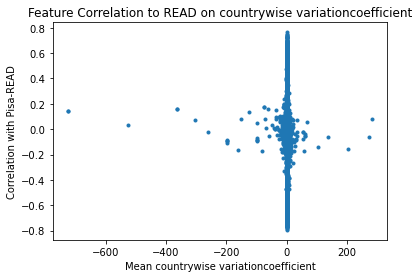

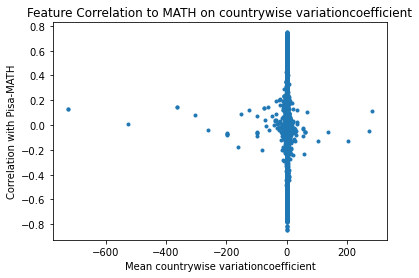

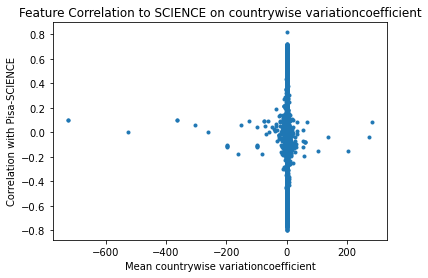

In [12]:
Pisa_Type = ["READ", "MATH", "SCIENCE"]
for pisa_type in Pisa_Type:
    plt.figure()
    plt.scatter(feature_analysis["Mean countrywise variationcoefficient"], feature_analysis[f"R for {pisa_type}"], marker='.')
    plt.xlabel("Mean countrywise variationcoefficient")
    plt.ylabel(f"Correlation with Pisa-{pisa_type}")
    plt.title(f"Feature Correlation to {pisa_type} on countrywise variationcoefficient")
    plt.show()
    plt.close()

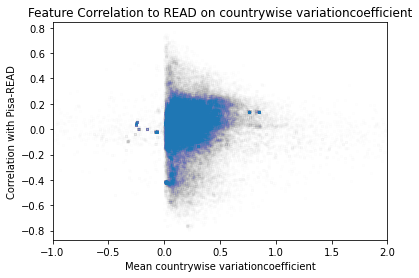

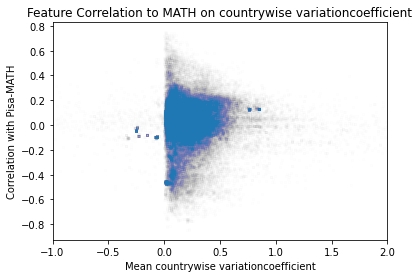

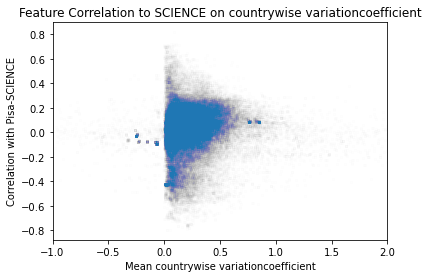

In [15]:
Pisa_Type = ["READ", "MATH", "SCIENCE"]
for pisa_type in Pisa_Type:
    plt.figure()
    plt.scatter(feature_analysis["Mean countrywise variationcoefficient"], feature_analysis[f"R for {pisa_type}"], marker='.', alpha=0.005)
    plt.xlabel("Mean countrywise variationcoefficient")
    plt.ylabel(f"Correlation with Pisa-{pisa_type}")
    plt.xlim(-1, 2)
    plt.title(f"Feature Correlation to {pisa_type} on countrywise variationcoefficient")
    plt.show()
    plt.close()

Man sieht, dass ein sehr großer Anteil der Features in dem Bereich liegt, dass die Korrelation zu Pisa gering ist aber die Streuung innerhalb eines Landes niedlich ist.
Wir stellen darauf basierend die Hypothese auf, dass der Großteil an Features im Baum dazu genutzt wird, die Werte des Features zu gruppieren und ihnen einen Pisa-Wert zuzuschreiben, nur weil die Pisa-Scores in der gleichen größenordnung vermutlich zum gleichen Land gehören.

Dieser Annahme zugrundelegend stellen wir fest, dass unser Entscheidungsbaum nicht dazu verwendet wird den Pisa-Score zu schätzen, sondern das Land zu schätzen.